<a href="https://colab.research.google.com/github/Soni-Test/Supervised-ML-Regression-NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## **Importing Libraries and Dataset**

In [ ]:
# Importing Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import datetime as dt

In [ ]:
#Importing DataSet from GitHub stored repository

df = pd.read_csv("https://media.githubusercontent.com/media/Soni-Test/Supervised-ML-Regression-NYC-Taxi-Trip-Time-Prediction/main/NYC%20Taxi%20Data.csv")

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
#Checking rows and columns
df.shape

(1458644, 11)

## **Data Cleaning**

In [ ]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
# Checking null/nan values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Here dataset is clean. So, we donot need further cleaning in our dataset.

In [ ]:
# use of function finding the total unique values in our dataset
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in id - 1458644
Total Unique Values in vendor_id - 2
Total Unique Values in pickup_datetime - 1380222
Total Unique Values in dropoff_datetime - 1380377
Total Unique Values in passenger_count - 10
Total Unique Values in pickup_longitude - 23047
Total Unique Values in pickup_latitude - 45245
Total Unique Values in dropoff_longitude - 33821
Total Unique Values in dropoff_latitude - 62519
Total Unique Values in store_and_fwd_flag - 2
Total Unique Values in trip_duration - 7417


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
# Checking types of columns present
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# **EDA** 

In [ ]:
# Now it is need to convert the timestamp to datetime format, so that we can easily extract out like days, months, weekday, hours, etc. from the dataset
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Checking the updated dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Further we need to extract out some more information from our newly added converted datetime, separately for pick-up date-timing of the passengers  

# For pickup 
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['pickup_weekday'] = df.pickup_datetime.dt.day_name()
df['pickup_month'] = df.pickup_datetime.dt.month
df['pickup_day_num'] = df.pickup_datetime.dt.weekday

# For dropoff
df['dropoff_weekday'] = df.dropoff_datetime.dt.day_name()


In the above created variables:


*   pickup_hour: contains 24 hour format of a day.
*   pickup_weekday: contains names of day.
*   pickup_month: contains month number from January to December.
*   pickup_day_num: contains number of days on which ride has been taken place from 0 to 6, i.e., Monday to Sunday.
*   dropoff_weekday: contains names of day for dropping from a ride. 



In [ ]:
# Importing library for distance calculation 

!pip install haversine
from haversine import haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **NOTE**

### **Haversine library** 
It is used to calculate the distance (in various units) between two points on Earth using their latitude and longitude. As here we have co-ordinates for the pick-up as well as drop-off for the passengers, this library will be very useful for that. 

In [ ]:
# By using Haversine formula distance is calculated between pick-up and dropoff with function 
def cal_dist(dis): 
    pickup = (dis['pickup_latitude'], dis['pickup_longitude'])
    drop = (dis['dropoff_latitude'], dis['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
#Distance calulation and adding new column in dataframe
df['distance'] = df.apply(lambda i: cal_dist(i), axis =1)

In [ ]:
# Same way now Speed is calulated in km/hr for the dataframe 
# Speed = Distance/(Time/3600) with conversion 

df['speed']= (df.distance/(df.trip_duration/3600))

In [ ]:
#Slot creation of time in days
def time_of_day(X):
  if X in range(6,12):
    return "Morining time"
  elif X in range(12,16):
    return "Afternoon time"
  elif X in range(16, 22):
    return "Evening time"
  else:
    return "Late nigth time"

In [ ]:
# Using the created function of time in day, a new column in dataset is added
df['pickuptime_of_day']=df.pickup_hour.apply(time_of_day)

# Checking the updated dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_weekday,pickup_month,pickup_day_num,dropoff_weekday,distance,speed,pickuptime_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,Monday,3,0,Monday,1.498523,11.856445,Evening time
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,Sunday,6,6,Sunday,1.805510,9.803672,Late nigth time
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,Tuesday,1,1,Tuesday,6.385107,10.822216,Morining time
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,Wednesday,4,2,Wednesday,1.485500,12.465738,Evening time
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,Saturday,3,5,Saturday,1.188590,9.836608,Afternoon time


In [ ]:
#Checking the type of newly added variable
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


## **Location Map**

In [ ]:
# Importing libraries for data visualization for geospational location
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [ ]:
# Grouping location of pickup by its pickup_latitude and pickup_longitude
pick_loc = df.groupby(['pickup_latitude','pickup_longitude'])['id'].count().reset_index().rename(columns={'id':'Number_of_times'})
pick_loc.head()

,pickup_latitude,pickup_longitude,Number_of_times
0,34.359695,-65.848389,1
1,34.712234,-75.354332,1
2,35.081532,-71.799896,1
3,35.310307,-72.074333,1
4,36.029301,-77.440750,1


In [ ]:
# Grouping location of pickup by its dropoff_latitude and dropoff_longitude
drop_loc = df.groupby(['dropoff_latitude','dropoff_longitude'])['id'].count().reset_index().rename(columns={'id':'Number_of_times'})
drop_loc.head()

,dropoff_latitude,dropoff_longitude,Number_of_times
0,32.181141,-73.834923,1
1,34.359695,-65.848389,1
2,35.173546,-72.022408,1
3,36.029301,-77.440750,1
4,36.118538,-68.778435,1


In [ ]:
# Rounding off the pickup latitudinal and longitudinal values upto 3 decimals.
pick_loc['pickup_lat_rd3'] = pick_loc['pickup_latitude'].apply(lambda x: round(x, 3))
pick_loc['pickup_lon_rd3'] = pick_loc['pickup_longitude'].apply(lambda x: round(x, 3))

# Rounding off the dropoff latitudinal and longitudinal values upto 3 decimals.
drop_loc['dropoff_lat_rd3'] = drop_loc['dropoff_latitude'].apply(lambda x: round(x, 3))
drop_loc['dropoff_lon_rd3'] = drop_loc['dropoff_longitude'].apply(lambda x: round(x, 3))

In [ ]:
# Grouping of the updated roundoff value of latitude and longitide with chnaging the column name of 'id' to 'Number of time'
drop_loc1 = drop_loc.groupby(['dropoff_lat_rd3','dropoff_lon_rd3'])['Number_of_times'].count().reset_index()
drop_loc1.head()

,dropoff_lat_rd3,dropoff_lon_rd3,Number_of_times
0,32.181,-73.835,1
1,34.360,-65.848,1
2,35.174,-72.022,1
3,36.029,-77.441,1
4,36.119,-68.778,1


In [ ]:
# Grouping of the updated roundoff value of latitude and longitide with chnaging the column name of 'id' to 'Number of time'
pick_loc1 = pick_loc.groupby(['pickup_lat_rd3','pickup_lon_rd3'])['Number_of_times'].count().reset_index()
pick_loc1.head()

,pickup_lat_rd3,pickup_lon_rd3,Number_of_times
0,34.360,-65.848,1
1,34.712,-75.354,1
2,35.082,-71.800,1
3,35.310,-72.074,1
4,36.029,-77.441,1


In [ ]:
# Co-ordinates of NYC City founded using Google Map
location = [40.730610, -73.935242]

# Listing the all the values together for pickup co-ordinates
pick = list(zip(pick_loc1.pickup_lat_rd3.values,
                            pick_loc1.pickup_lon_rd3.values,
                            pick_loc1.Number_of_times.values.astype(float)))
# Listing the all the values together for dropoff co-ordinates
drop = list(zip(drop_loc1.dropoff_lat_rd3.values,
                            drop_loc1.dropoff_lon_rd3.values,
                            drop_loc1.Number_of_times.values.astype(float)))


In [ ]:
# Creating array for pickup co-ordinates
pick_loc1.values

array([[ 34.36 , -65.848,   1.   ],
       [ 34.712, -75.354,   1.   ],
       [ 35.082, -71.8  ,   1.   ],
       ...,
       [ 43.912, -71.882,   1.   ],
       [ 44.372, -66.972,   1.   ],
       [ 51.881, -72.81 ,   1.   ]])

In [ ]:
# Creating array for dropoff co-ordinates
drop_loc1.values

array([[ 32.181, -73.835,   1.   ],
       [ 34.36 , -65.848,   1.   ],
       [ 35.174, -72.022,   1.   ],
       ...,
       [ 43.674, -79.554,   1.   ],
       [ 43.912, -71.882,   1.   ],
       [ 43.921, -79.519,   1.   ]])

In [ ]:
# Now using folium.Map we will start adding the interactive map
pickup_map = folium.Map(location = location, zoom_start = 9)

# Now creating the heatmap of all the pickup locations together
heatmap = HeatMap(pick_loc1,
                  min_opacity = 0.3,
                  radius = 9, blur = 10,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

# Plotting the map
pickup_map

In [ ]:
# Now using folium.Map we will start adding the interactive map
dropoff_map = folium.Map(location = location, zoom_start = 9)

# Now creating the heatmap of all the dropoff locations together
heatmap1 = HeatMap(drop_loc1,
                  min_opacity = 0.3,
                  radius = 9, blur = 10,
                  max_zoom = 1)

dropoff_map.add_child(heatmap1)

# Plotting the map
dropoff_map

## **Univariate Analysis**
  - **for individual features**

### Exploring the Dependable Variable, i.e, Trip_Duration

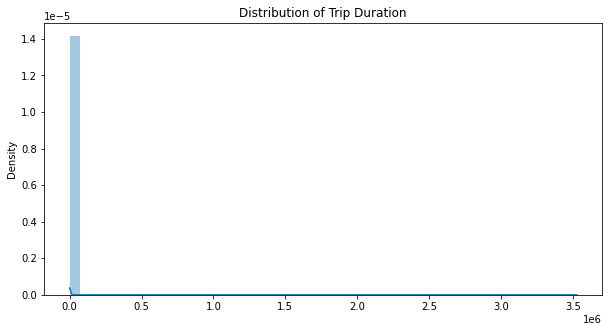

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(df['trip_duration'].values).set_title('Distribution of Trip Duration')
plt.show()

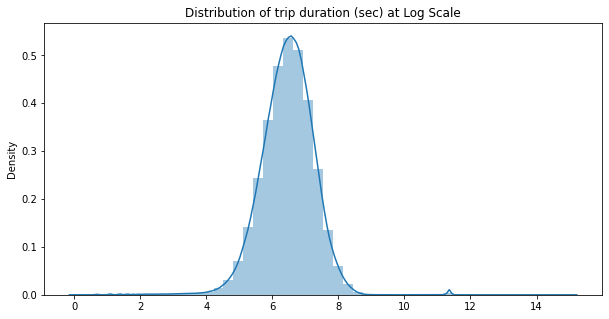

In [ ]:
# As the variable is right skewed, hence natural log value is applied to transform into for normal distribution.
plt.figure(figsize = (10, 5))
sns.distplot(np.log(df['trip_duration'].values)).set_title('Distribution of Trip Duration')
plt.title('Distribution of trip duration (sec) at Log Scale')
plt.show()

After application of log transform, the variable trip_duration showing normal distribution.

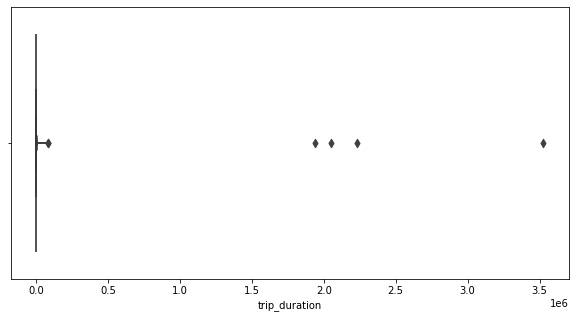

In [ ]:
# Plotting to check the outliers 
plt.figure(figsize = (10,5))
sns.boxenplot(df.trip_duration)
plt.show()

Few outliers are present in our dependable feature which should be removed for data consistency

In [ ]:
# checking outliers and removing 
# Calculating 0-100 percentile to detect correction value of outlier removal

for i in range (0,100,10):
  trip_dur = df['trip_duration'].values
  trip_dur = np.sort(trip_dur, axis = None)
  print ("{} percentile value -> {}".format(i, trip_dur[int(len(trip_dur)*(float(i)/100))]))
print("100 percentile value -> ", trip_dur[-1])

0 percentile value -> 1
10 percentile value -> 245
20 percentile value -> 348
30 percentile value -> 446
40 percentile value -> 548
50 percentile value -> 662
60 percentile value -> 798
70 percentile value -> 968
80 percentile value -> 1208
90 percentile value -> 1634
100 percentile value ->  3526282


In [ ]:
# Still it has been found some inconsistency in the percentile value between 90-100, which we need to remove or correct them for getting our data ready for further analysis 

for i in range (90, 100):
  trip_dur = df['trip_duration'].values
  trip_dur = np.sort(trip_dur, axis = None)
  print ("{} Specific percentile value -> {}".format(i, trip_dur[int(len(trip_dur)*(float(i)/100))]))
print("100 percentile value -> ", trip_dur[-1])

90 Specific percentile value -> 1634
91 Specific percentile value -> 1703
92 Specific percentile value -> 1780
93 Specific percentile value -> 1869
94 Specific percentile value -> 1975
95 Specific percentile value -> 2104
96 Specific percentile value -> 2273
97 Specific percentile value -> 2497
98 Specific percentile value -> 2829
99 Specific percentile value -> 3440
100 percentile value ->  3526282


In [ ]:
# Grouping the number of trips with respect to trip duration
trip = df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count()
trip

trip_duration
(1, 601]        654140
(601, 1201]     509505
(1201, 1801]    182014
(1801, 2401]     63529
(2401, 3001]     25633
(3001, 3601]     11492
(3601, 4201]      5410
(4201, 4801]      2631
(4801, 5401]      1161
(5401, 6001]       529
(6001, 6601]       221
Name: trip_duration, dtype: int64

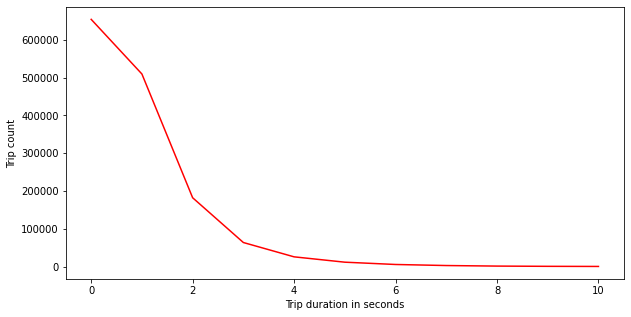

In [ ]:
# Plotting the same above value for proper understanding the range and the changes observed.
plt.figure(figsize =(10,5))
plt.plot(df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count(), 
         linestyle='solid', color='r')
plt.xlabel('Trip duration in seconds')
plt.ylabel('Trip count')
plt.show()

It can be seen clearly at the top above the plot, most of the trip duration has been completed within a hour(3600 seconds).

And as from the above plot itself very trips have duration more than 5000 seconds and few with duration low as 1 seconds (for 0 km distance).

In [ ]:
# We need to maintain the data consistency, hence its time to remove some seen outliers.
df = df[df.trip_duration <= 5000]
df = df[df.trip_duration >= 60]

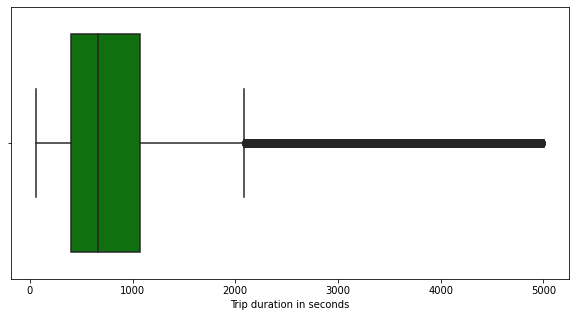

In [ ]:
# Again plotting the values to recheck the correction of removal of outliers
plt.figure(figsize = (10,5))
sns.boxplot(df.trip_duration, color='green')
plt.xlabel('Trip duration in seconds')
plt.show()

Mostly trip durations completed within 10-20 min and observed trips took 0-30 min (1800 seconds). 

## **Number of Passenger**

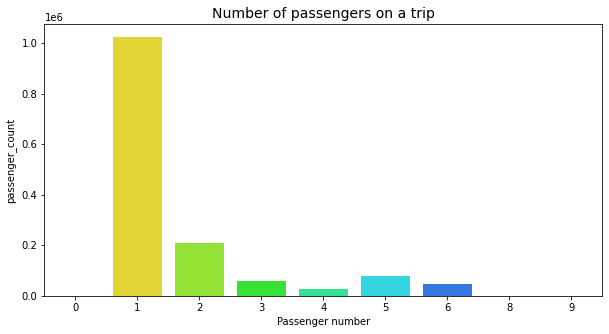

In [ ]:
# Exploring the passenger_count 
fig = plt.figure(figsize=(10,5))
passenger = df['passenger_count'].value_counts()
sns.barplot(x=passenger.index, y= passenger, alpha= 0.9, palette= 'gist_rainbow')
plt.title('Number of passengers on a trip', fontsize=14)
plt.xlabel('Passenger number')
plt.show()

From the above plot we can see there are in few instances there are more than 6 passengers in a cab or taxi and also some has 0 also, which is next to impossible situtation. But maximum number of passengers is 1 only which is ideal for any trip. 

In [ ]:
# Analyzing from above plot the number of passenger count, we can try to remove the rows which have zero (0) or more than 6 passenger count.
df = df[df['passenger_count']!=0]
df = df[df['passenger_count']<=6]

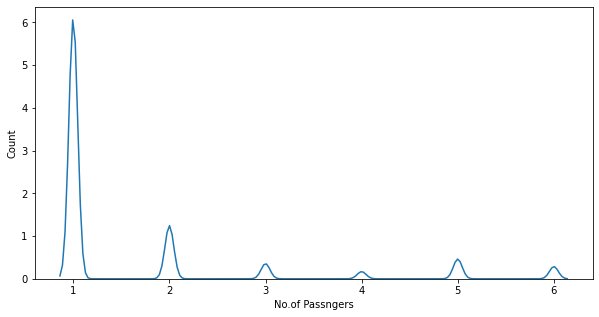

In [ ]:
# Passenger count
plt.figure(figsize = (10,5))
sns.kdeplot(x='passenger_count',data=df, bw_adjust=.6)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

From the above plot also after removal of the unideal conditions for the number of passengers. The highest number of passenger is of single or 1, who travels more in compare to people travelling in a group. 

## **Trips per day**

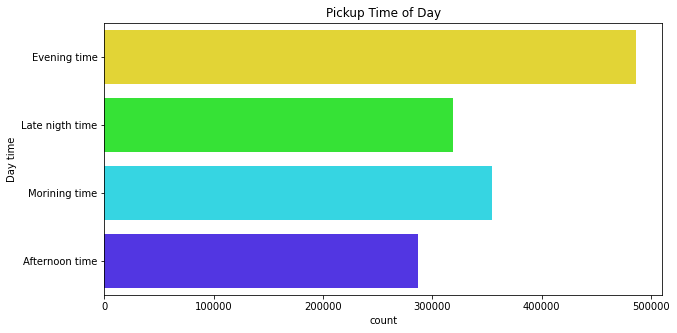

In [ ]:
# Count of trips per time_slots
plt.figure(figsize = (10,5))
sns.countplot(y='pickuptime_of_day', data=df, palette= 'gist_rainbow', alpha=0.9)
plt.title('Pickup Time of Day')
plt.ylabel('Day time')
plt.show()

Evening time is very busy for the travelling the time.

## **Trips per hour of the day**

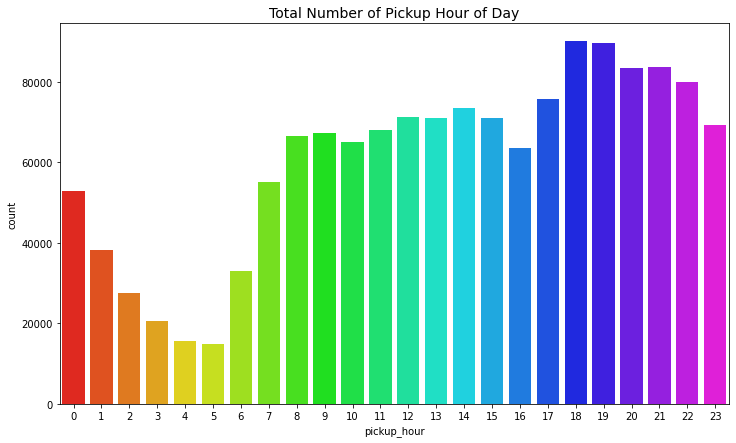

In [ ]:
# Pickup distribution over hour of the day

pick_hour = plt.figure(figsize = (12,7))
sns.countplot(x='pickup_hour',data=df,palette='gist_rainbow')
plt.title('Total Number of Pickup Hour of Day',fontsize=14)
plt.show()

From above plot it can be clearly viewed that the timing between 6.00 pm to 7.00 pm in evening are the pick time for travelling. As this is the time when lot of working class people and market going people prefer to travel. 

## **Trips per days of a month**

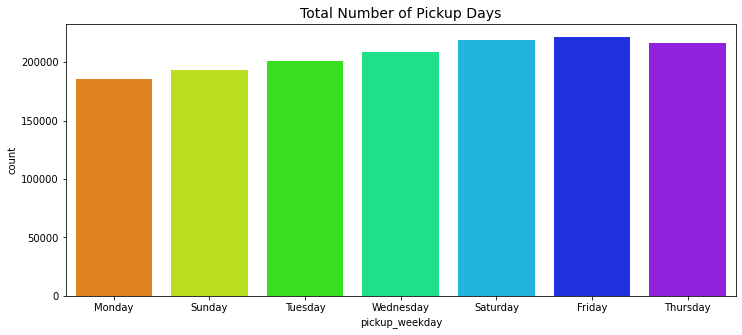

In [ ]:
# Pickup distribution over days
pick_day = plt.figure(figsize = (12,5))
sns.countplot(x='pickup_weekday', data=df, palette='gist_rainbow')
plt.title('Total Number of Pickup Days',fontsize=14)
plt.show()

From the above plot it can be seen that day of Friday is the most busiest followed by Saturday and Thrusday and so on. This is happening maybe weekend is near. As well as Monday is least. 

## **Trips per month**

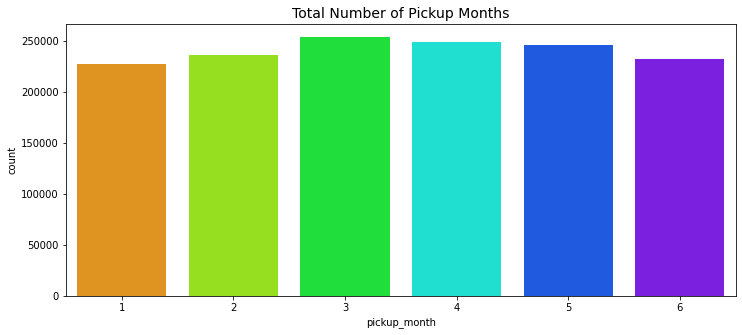

In [ ]:
# Pickup distribution over months
pick_month = plt.figure(figsize = (12,5))
sns.countplot(x='pickup_month', data=df, palette='gist_rainbow')
plt.title('Total Number of Pickup Months',fontsize=14)
plt.show()

Not much change is being observed in between the months. So, no specfic insights can be extracted. 

## **Trips per number of weekdays**

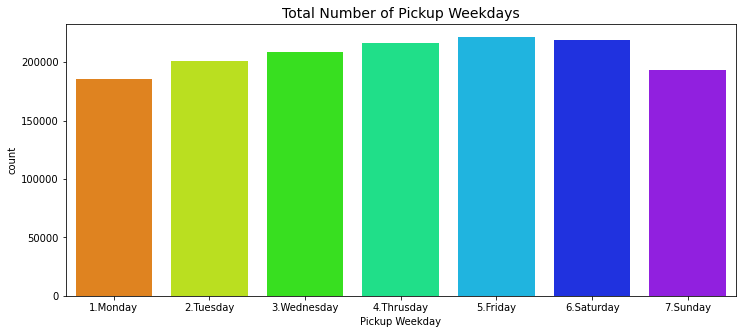

In [ ]:
# Pickup distribution over week day
pick_weekday = plt.figure(figsize = (12,5))
sns.countplot(x='pickup_day_num', data=df, palette='gist_rainbow')
plt.title('Total Number of Pickup Weekdays',fontsize=14)
plt.xlabel('Pickup Weekday')
plt.xticks([i for i in range(7)],
           ('1.Monday', 
            '2.Tuesday',
            '3.Wednesday',
            '4.Thrusday', 
            '5.Friday', 
            '6.Saturday', 
            '7.Sunday'))
plt.show()

Here also it can be observered from the above plot when it comes to maximum number of week days, again Friday has shown the maximum movement/rush among the passengers which is followed by saturday and thrusday. 

## **Distance distribution** 

In [ ]:
# Distance distribution
df.distance.value_counts()

0.000000    4216
0.000424      14
0.000848       8
0.000424       8
0.001273       6
            ... 
4.218078       1
8.860892       1
1.498127       1
2.917715       1
1.134044       1
Name: distance, Length: 1441975, dtype: int64

In [ ]:
# Checking the description of distance
df.distance.describe()

count    1.446257e+06
mean     3.441529e+00
std      4.252382e+00
min      0.000000e+00
25%      1.243735e+00
50%      2.104166e+00
75%      3.882887e+00
max      1.240910e+03
Name: distance, dtype: float64

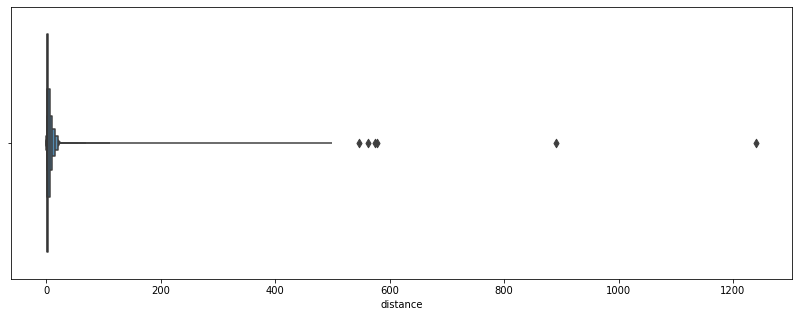

In [ ]:
# Plotting the distance for checking if there is any outlier or not
plt.figure(figsize = (14,5))
sns.boxenplot(df.distance)
plt.show()

From the above boxplot, following points can be pointed out: 


*   Some trips are above 100 km, at maximum range went to 1200 km but maximum showed 0 km. 
*   Dropoff location cannot be determined from the above plot.
*   There might be cancellation or other issue from taxi personal or passenger side, where 0 km trip distance is showing.



In [ ]:
# Again removing the outliers and chaning value
df = df[~(df.distance > 100)]
df = df[~(df.distance < 1)]

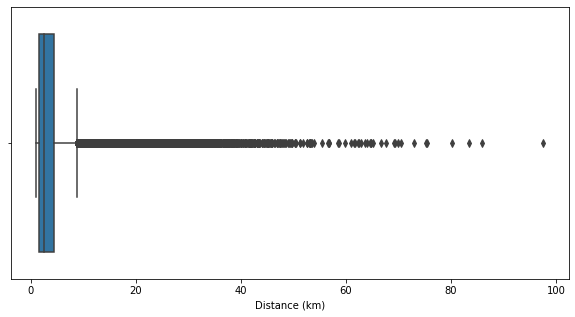

In [ ]:
#Plotting the updated value of distance
plt.figure(figsize = (10,5))
sns.boxplot(df.distance)
plt.xlabel('Distance (km)')
plt.show()

Showing the updated value of distance variable between 0 to 100 km.

## **Speed distribution**

In [ ]:
# Speed distribution 
df.speed.value_counts()

9.580937     2
11.856445    1
24.973026    1
12.398293    1
10.174206    1
            ..
19.711113    1
13.742299    1
8.855924     1
5.859783     1
20.618973    1
Name: speed, Length: 1209250, dtype: int64

In [ ]:
df.speed.describe()

count    1.209251e+06
mean     1.523585e+01
std      7.799828e+00
min      7.774623e-01
25%      9.882900e+00
50%      1.354738e+01
75%      1.867582e+01
max      5.837351e+02
Name: speed, dtype: float64

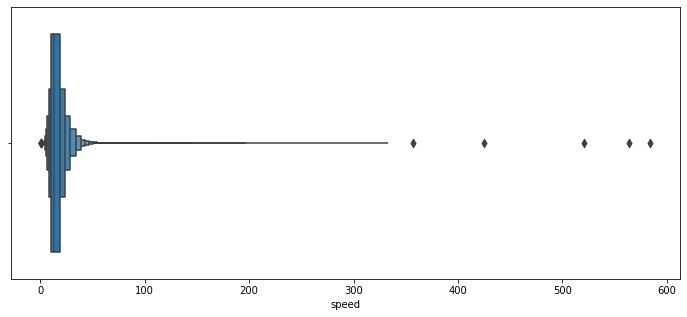

In [ ]:
# Plotting the values of speed 
plt.figure(figsize = (12,5))
sns.boxenplot(df.speed)
plt.show()

Showing the overall distribution of speed in the dataset, which showing some outliers.

In [ ]:
# To check largest value of speed - Top 20
df.speed.nlargest(20)

693299     583.735119
1359910    564.207996
218935     520.505485
500725     424.861400
473439     356.616631
191997     318.579993
793555     270.595429
1328401    255.419839
176589     226.716076
656806     197.129407
1035451    195.136268
1166323    190.931835
1327633    188.464178
775976     180.811877
945772     166.043252
125668     163.573989
587146     160.768363
13046      153.559290
182695     146.281407
1093421    144.334947
Name: speed, dtype: float64

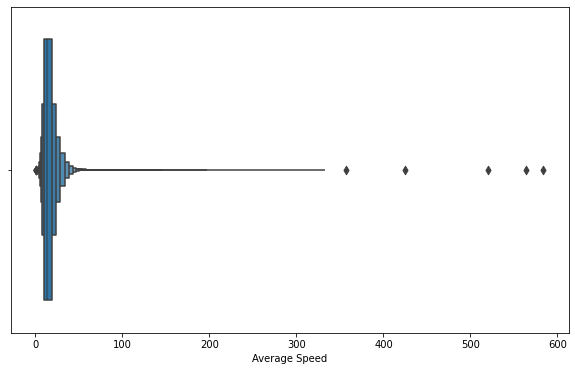

In [ ]:
# Plotting again to check its distribution as average speed
plt.figure(figsize = (10,6))
sns.boxenplot(df.speed)
plt.xlabel('Average Speed')
plt.show()

Here we can find out that the there are some values which is above 60 km/h. 

As per the New York City (NYC), speed limit rule, the normal speed should be 40 km/h. But the average speed here is over 60 km/h which is unreasonable.

In [ ]:
# Finding the average speed less than 60 km/h
df = df[~(df.speed > 60)]

In [ ]:
# Overall the Slowest speed - Top 20
df.speed.nsmallest(20)

1165873    0.777462
24426      0.825900
1025910    0.877407
1440074    0.900916
1453671    0.913801
440689     0.954780
210725     0.962457
985326     0.988256
623249     0.991219
251672     0.998664
113098     1.006520
224795     1.040899
633226     1.053434
722364     1.058744
28169      1.061677
1359058    1.062566
676578     1.064532
900628     1.064742
305608     1.075162
116907     1.082382
Name: speed, dtype: float64

Here we can see there are some values who's speed is 0 km/h which are not required for further analysis. 

In [ ]:
# Removing the values having average speed less than 1 km/h
df = df[~(df.speed < 1)]

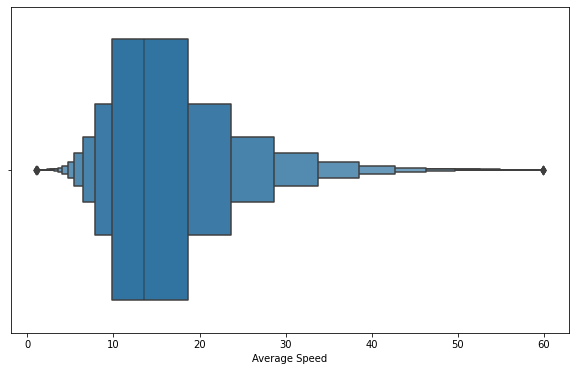

In [ ]:
# Plotting again to check final updated distribution as average speed after removal of average speed less than 1 km/h
plt.figure(figsize = (10,6))
sns.boxenplot(df.speed)
plt.xlabel('Average Speed')
plt.show()

The above plot shows speed range between 0 - 60 km/h.

## **Store and Forward Flag**

In [ ]:
# Analyzing the store & forward flag
df.store_and_fwd_flag.value_counts()

N    1202056
Y       6785
Name: store_and_fwd_flag, dtype: int64

In [ ]:
# Normalizing the values
df.store_and_fwd_flag.value_counts(normalize=True)

N    0.994387
Y    0.005613
Name: store_and_fwd_flag, dtype: float64

From the above description, it can be analyzed that only 0.99% ~ 1% of the trip details were stored in the vechile memory sending before the server. And this might be occured due to issue low battery in the GPS or mobile devices.

## **Trip duration per Vendor distribution**

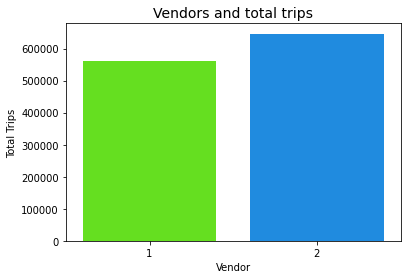

In [ ]:
# Exploring the vendor_id column
vendors = df['vendor_id'].value_counts()
sns.barplot(x=vendors.index, y=vendors.values, palette = 'gist_rainbow')
plt.xlabel('Vendor')
plt.ylabel('Total Trips')
plt.title("Vendors and total trips", fontsize=14)
plt.show()

The above bar plot doesn't show much difference among the vendors id for the number of trips taken.

## **Distribution of speed range of trip**

In [ ]:
# Overall range of speed per trip count 
sp = df.trip_duration.groupby(pd.cut(df.speed, np.arange(1,104,10))).count()
sp

speed
(1, 11]      396063
(11, 21]     594749
(21, 31]     162916
(31, 41]      42380
(41, 51]      10997
(51, 61]       1736
(61, 71]          0
(71, 81]          0
(81, 91]          0
(91, 101]         0
Name: trip_duration, dtype: int64

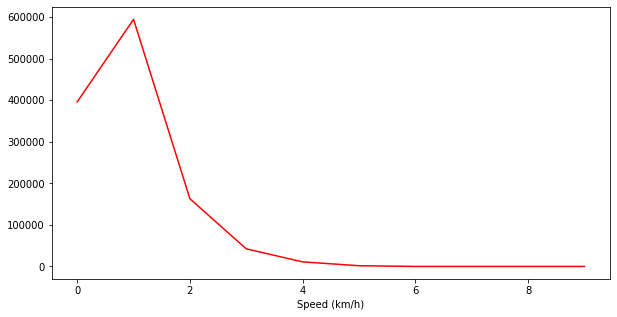

In [ ]:
# Plotting the range
plt.figure(figsize =(10,5))
plt.plot(sp,linestyle='solid', color='r')
plt.xlabel('Speed (km/h)')
plt.show()

The plot showcases, most of the trips completed at the speed range between 10 km/h - 20 km/h. 

*         Where most is 10 km/h. 

## **Bivariate Analysis**

## **Duration of trip per hour**

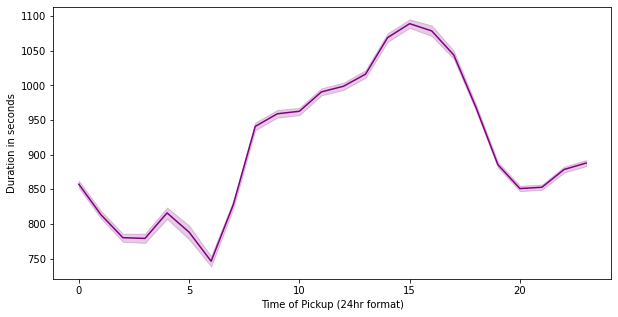

In [ ]:
# Plotting for pickup_hour and trip duration
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df, color='purple')
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration in seconds')
plt.show()

Following observations pointed:


*   Trip duration reaches its pick around 3pm.
*   And lowest at 6 am in early morning.



## **Overall Speed range and distance per trip**

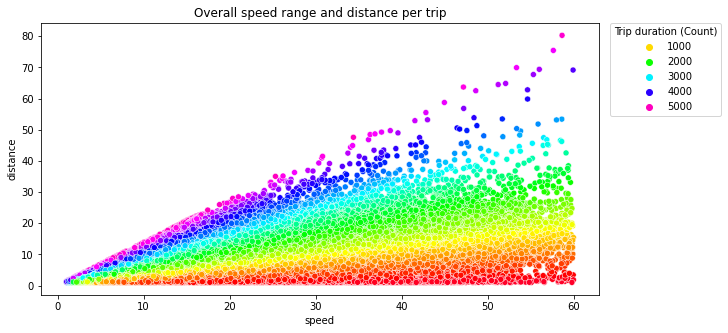

In [ ]:
# Count value vs overall average speed and distance
plt.figure(figsize =(10,5))
sns.scatterplot(data=df, x="speed", y="distance", hue="trip_duration", palette='gist_rainbow')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title= 'Trip duration (Count)')
plt.title("Overall speed range and distance per trip")
plt.show()

It can be observed at few values the speed at 60 km/hr travels the maximum distances. 

## **Duration of trip per month**

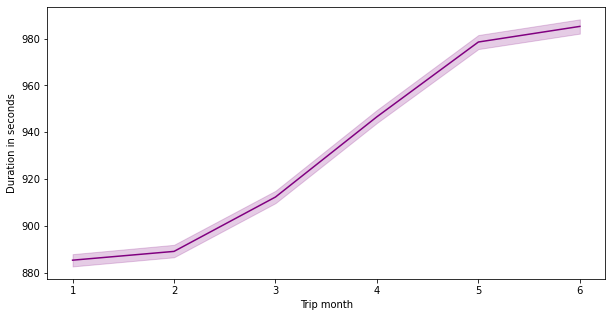

In [ ]:
# Plot for trip duration per month
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_month',y='trip_duration', data=df, color='purple')
plt.ylabel('Duration in seconds')
plt.xlabel('Trip month')
plt.show()

Showing the plot trip duration in following of 6 months in total.


*  It is lowest at its starting month.
*  But the picks up suddenly in the 5th month of the year. 



## **Duration of trip per weekday**

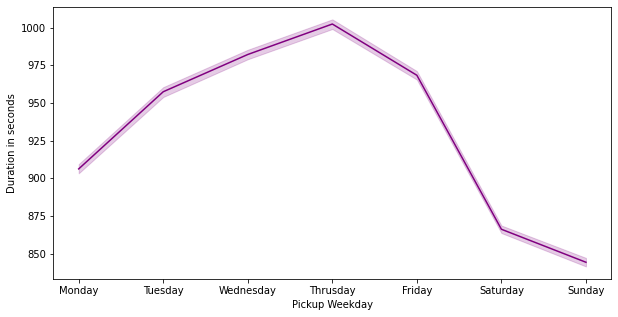

In [ ]:
# Plot for duration of trip per weekday
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_day_num',y='trip_duration',data=df, color ='purple')
plt.ylabel('Duration in seconds')
plt.xlabel('Pickup Weekday', fontsize = 10)
plt.xticks([i for i in range(7)],
           ('Monday', 
            'Tuesday',
            'Wednesday',
            'Thrusday', 
            'Friday', 
            'Saturday', 
            'Sunday'))
plt.show()

Following points obsereved:


*   Thrusday being the top day of the weekady.
*   But the trip number suddenly drops on Sunday, reason might be due to no office and school/college day and people wants to rest at home.
*    Change in the trip duration can be clearly observed from the plot. 



## **Trips as per weekdays and hours**

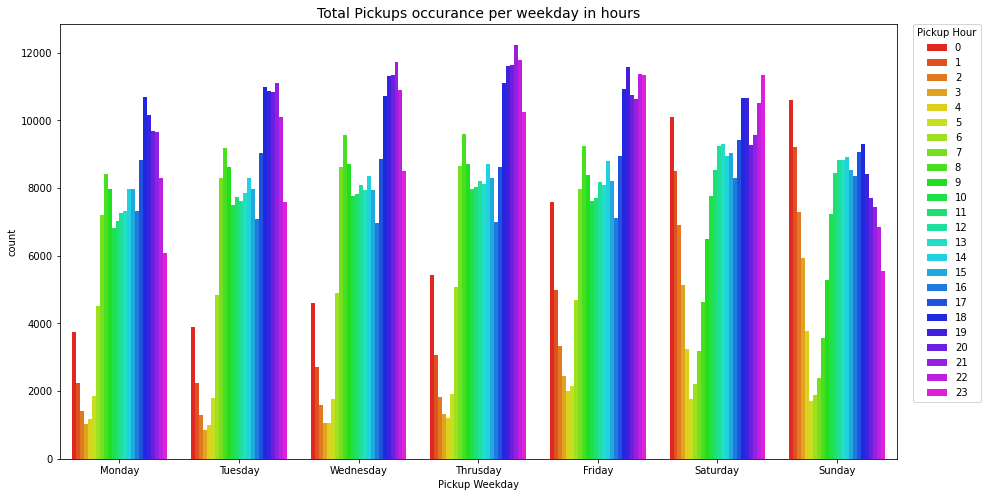

In [ ]:
# Finding the distribution of pickup hours in combination of weekdays number and hours
pick_day_hr = plt.figure(figsize = (15,8))
sns.countplot(x='pickup_day_num', data=df, palette='gist_rainbow', hue ='pickup_hour')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Pickup Hour')
plt.title('Total Pickups occurance per weekday in hours',fontsize=14)
plt.xlabel('Pickup Weekday', fontsize = 10)
plt.xticks([i for i in range(7)],
           ('Monday', 
            'Tuesday',
            'Wednesday',
            'Thrusday', 
            'Friday', 
            'Saturday', 
            'Sunday'))
plt.show()

Following points can be observed:

*   Common point is that in all weekdays, lowest trip number can be seen around 6am in early morning.
*   Again in all weekdays maximum number of pick hours can be observed around between 3pm to 4pm, with some variation in all weekdays. 



## **Duration of trip per store and forward flag**

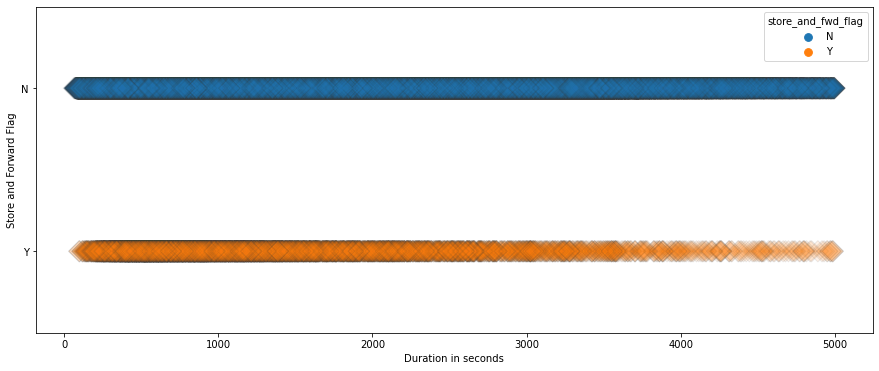

In [ ]:
# Duration of trip per Store and Forward Flag
plt.figure(figsize = (15,6))
sns.stripplot(x='trip_duration',y='store_and_fwd_flag',data=df, hue='store_and_fwd_flag',
              jitter=False, s=15, marker="D", linewidth=1, alpha=0.1)
plt.ylabel('Store and Forward Flag')
plt.xlabel('Duration in seconds')
plt.show()

Not much difference between Y and N 

## **Trip duration and Distance**

In [ ]:
# Removing trips covered 0 km distance
df = df[~(df.distance == 0)]

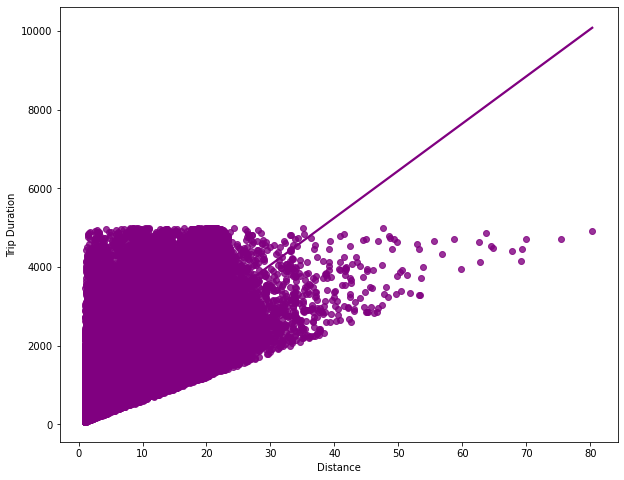

In [ ]:
# Plotting graph for trip duration and Distance
plt.figure(figsize = (10,8))
sns.regplot(df.distance, df.trip_duration, color= 'purple')
plt.ylabel('Trip Duration')
plt.xlabel('Distance')
plt.show()

Regression line showing some linear relation between trip duration and distance.

## **Distance and Speed**

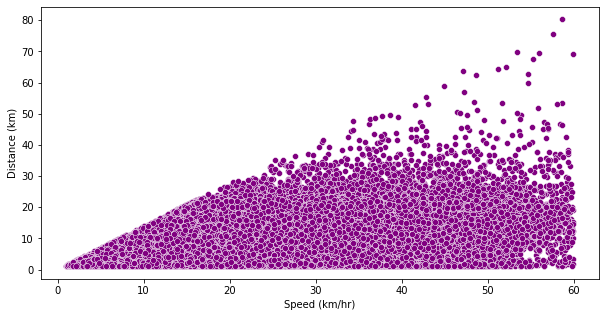

In [ ]:
# Plot for trip duration per month
plt.figure(figsize = (10,5))
sns.scatterplot(x='speed',y='distance', data=df, color='purple')
plt.ylabel('Distance (km)')
plt.xlabel('Speed (km/hr)')
plt.show()

Some values reaches the maximum speed with maximum distance.

## **Feature Engineering**

## **Feature encoding**

In [ ]:
# Column analysis
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'pickup_day_num', 'dropoff_weekday', 'distance', 'speed',
       'pickuptime_of_day'],
      dtype='object')

In [ ]:
# Now columns like "store_and_fwd_flag" and "pickup_day" are dummified as all these will be further used in
# -- model prepraration for prediction.As dummification will help in avoidance of copying of same data.

dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='store_and_fwd_flag')
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.pickup_weekday, prefix='pickup_day', drop_first=True)
df = pd.concat([df,dummy], axis = 1)


In [ ]:
# Converting trip_duration in hours by dividing it by 3600
df['trip_duration_hr']= df['trip_duration']/3600

In [ ]:
# Updated column of dataset
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'pickup_day_num', 'dropoff_weekday', 'distance', 'speed',
       'pickuptime_of_day', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'pickup_day_Monday', 'pickup_day_Saturday', 'pickup_day_Sunday',
       'pickup_day_Thursday', 'pickup_day_Tuesday', 'pickup_day_Wednesday',
       'trip_duration_hr'],
      dtype='object')

In [ ]:
# Dropping the column variables that are not needed in further analysis
df = df.drop(['id','pickup_datetime', 'dropoff_datetime',
              'store_and_fwd_flag', 
              'dropoff_weekday', 'pickup_weekday', 
              'pickuptime_of_day', 'trip_duration', 'speed', 'pickup_day_num'], axis=1)

In [ ]:
# Checking updated dataframe 
pd.set_option('max_columns', None)     #Code for maximizing the columns
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,pickup_month,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,trip_duration_hr
0,2,1,-73.982155,40.767937,-73.964630,40.765602,17,3,1.498523,1,0,1,0,0,0,0,0,0.126389
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,1.805510,1,0,0,0,1,0,0,0,0.184167
2,2,1,-73.979027,40.763939,-74.005333,40.710087,11,1,6.385107,1,0,0,0,0,0,1,0,0.590000
3,2,1,-74.010040,40.719971,-74.012268,40.706718,19,4,1.485500,1,0,0,0,0,0,0,1,0.119167
4,2,1,-73.973053,40.793209,-73.972923,40.782520,13,3,1.188590,1,0,0,1,0,0,0,0,0.120833


In [ ]:
df.shape

(1208841, 18)

In [ ]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208841 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1208841 non-null  int64  
 1   passenger_count       1208841 non-null  int64  
 2   pickup_longitude      1208841 non-null  float64
 3   pickup_latitude       1208841 non-null  float64
 4   dropoff_longitude     1208841 non-null  float64
 5   dropoff_latitude      1208841 non-null  float64
 6   pickup_hour           1208841 non-null  int64  
 7   pickup_month          1208841 non-null  int64  
 8   distance              1208841 non-null  float64
 9   store_and_fwd_flag_N  1208841 non-null  uint8  
 10  store_and_fwd_flag_Y  1208841 non-null  uint8  
 11  pickup_day_Monday     1208841 non-null  uint8  
 12  pickup_day_Saturday   1208841 non-null  uint8  
 13  pickup_day_Sunday     1208841 non-null  uint8  
 14  pickup_day_Thursday   1208841 non-

Hence, the dataset is ready for the model preparation and prediction analysis. 

### **Splitting the dataset into train and test, for fitting into specific models**

In [ ]:
# Creating lists of features values required for analysis
col = df.describe().columns
col = list(col)
col = col[:-1]
col

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_hour',
 'pickup_month',
 'distance',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday']

In [ ]:
#Importing Library
from scipy.stats import zscore

In [ ]:
# Splitting the dataset as train-test split with application of z-score for selecting only portion from them
X = df[col].apply(zscore)[:]
y = df['trip_duration_hr'][:]

In [ ]:
# Importing library
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into 80-20 for training and testing purpose respectively,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Shape checking of split for training set
print(X_train.shape, y_train.shape)

(967072, 17) (967072,)


In [ ]:
# Shape checking of split for test set
print(X_test.shape, y_test.shape)

(241769, 17) (241769,)


# **Algorithm Development**

## **Correlation among variables**

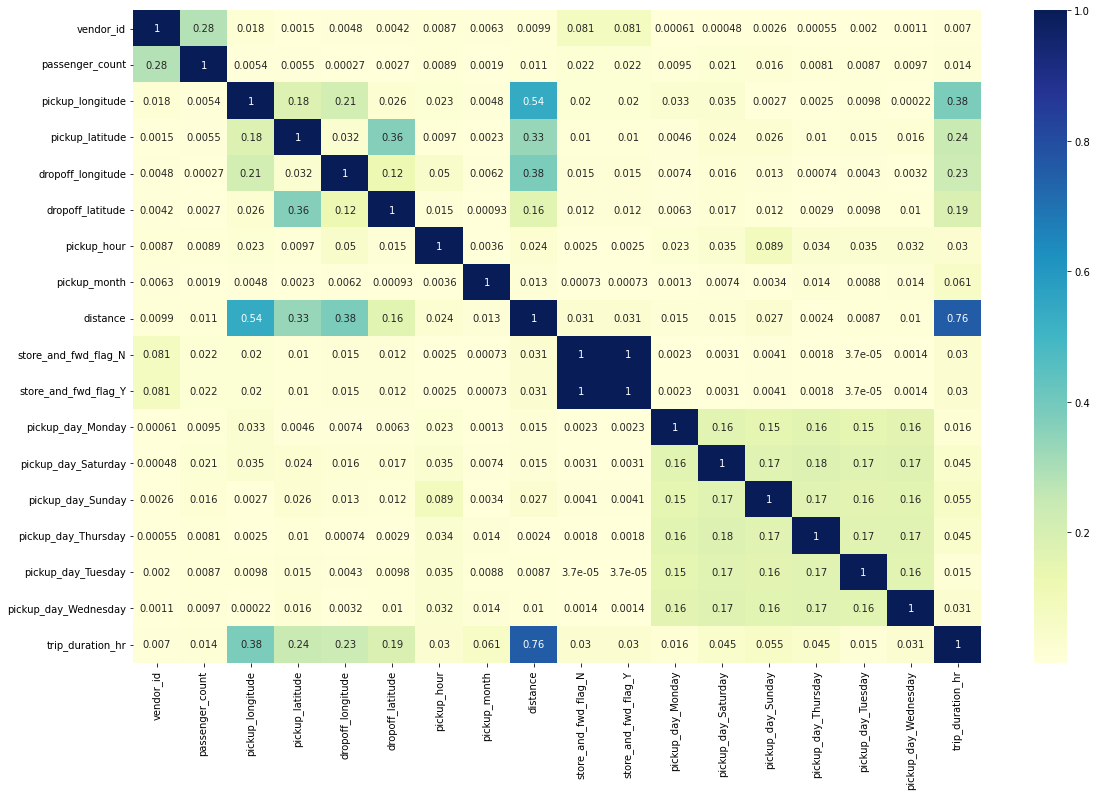

In [ ]:
# Correlation using heatmap
plt.figure (figsize= (19,12))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='YlGnBu')

In [ ]:
print(df.corr())

                      vendor_id  passenger_count  pickup_longitude  \
vendor_id              1.000000         0.284618          0.018119   
passenger_count        0.284618         1.000000          0.005360   
pickup_longitude       0.018119         0.005360          1.000000   
pickup_latitude        0.001544        -0.005522         -0.178245   
dropoff_longitude      0.004750         0.000265          0.214547   
dropoff_latitude       0.004224        -0.002664          0.025967   
pickup_hour            0.008711         0.008864          0.022599   
pickup_month          -0.006281        -0.001930          0.004801   
distance               0.009863         0.010517          0.540910   
store_and_fwd_flag_N   0.080540         0.021553         -0.019671   
store_and_fwd_flag_Y  -0.080540        -0.021553          0.019671   
pickup_day_Monday     -0.000613        -0.009483          0.032600   
pickup_day_Saturday   -0.000482         0.020779         -0.034508   
pickup_day_Sunday   

## **Linear Regression**

In [ ]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
# Fitting into linear regression for train and test
lreg = LinearRegression().fit(X_train, y_train)
lreg.score(X_train, y_train)

0.5959769698354094

In [ ]:
# Train prediction
y_train_pred = lreg.predict(X_train)
y_train_pred

array([0.16730739, 0.6712926 , 0.15874316, ..., 0.21769995, 0.22398786,
       0.31500495])

In [ ]:
# Test prediction
y_test_pred = lreg.predict(X_test) 
y_test_pred

array([0.23519894, 0.14201802, 0.31210809, ..., 0.17995438, 0.32706473,
       0.2230835 ])

### **Linear Regression Evaluation**

In [ ]:
# Importing libraries metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# For train set 
lr_MSE_tr  = mean_squared_error((y_train), (y_train_pred))
print("LR MSE : ", lr_MSE_tr)

lr_RMSE_tr = np.sqrt(lr_MSE_tr)
print("LR RMSE : " , lr_RMSE_tr)

lr_R2_tr = r2_score((y_train), (y_train_pred))
print("LR R2 : " ,lr_R2_tr) 

lr_Ad_R2_tr = 1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("LR Adjusted R2 : ",lr_Ad_R2_tr)

LR MSE :  0.012790942595478583
LR RMSE :  0.1130970494552293
LR R2 :  0.5959769698354094
LR Adjusted R2 :  0.5959698674486628


In [ ]:
# For testing set
lr_MSE_tst  = mean_squared_error(y_test, y_test_pred)
print("Lasso test MSE :" , lr_MSE_tst)

lr_RMSE_tst = np.sqrt(lr_MSE_tst)
print("Lasso test RMSE :" ,lr_RMSE_tst)

lr_R2_tst = r2_score(y_test, y_test_pred)
print("Lasso test R2 :" ,lr_R2_tst)

lr_Ad_R2_tst= 1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Lasso test Adjusted R2 : ", lr_Ad_R2_tst)

Lasso test MSE : 0.01275223789446085
Lasso test RMSE : 0.11292580703479985
Lasso test R2 : 0.5956797131178813
Lasso test Adjusted R2 :  0.5956512811987703


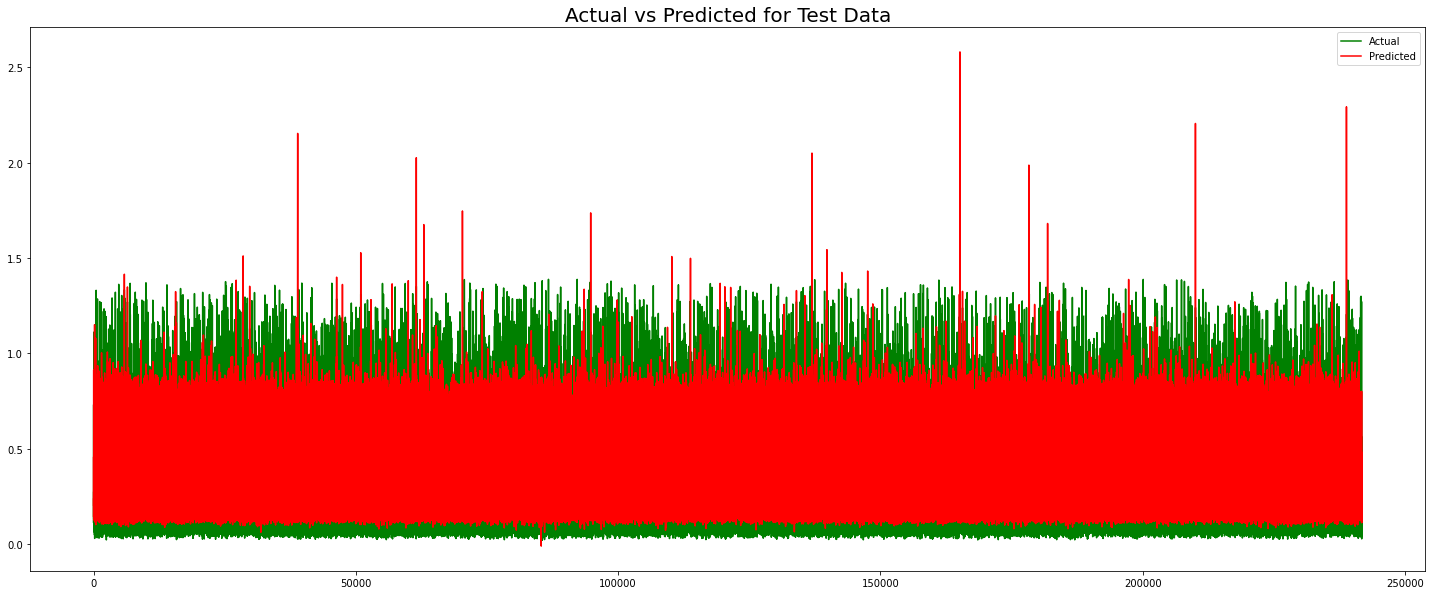

In [ ]:
# Comparing Actual vs Prediction
plt.figure(figsize= (25,10))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=1.5, linestyle='-')
plt.plot(c, y_test_pred, color='red', linewidth=1.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

The prediction output shows us the underfitting result which also concludes high prediction error. Hence, linear regression not useful here. 

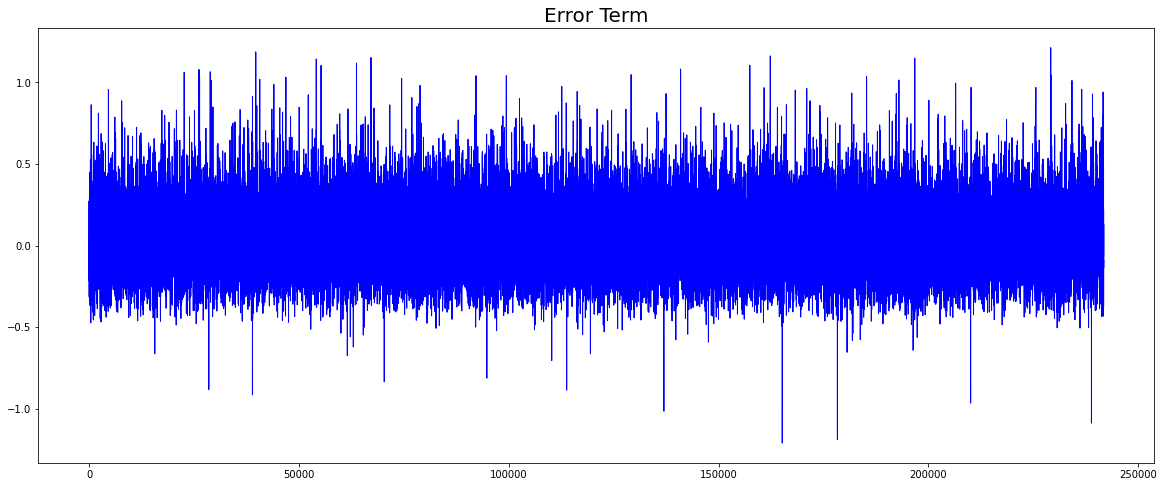

In [ ]:
plt.figure(figsize= (20,8))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_test_pred, color='blue', linewidth=1, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

Overall difference between test and prediction data observed in error term.

## **Lasso Regression**

In [ ]:
# Importing library
from sklearn.linear_model import Lasso

### **Cross Validation** 

In [ ]:
# Now Cross Validation and checking the required parameters 

lasso = Lasso()

#Cross Validation
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
# Finding best fit Alpha value
print('Best fit alpha value is :', lasso_regressor.best_params_)
print('R2 score using the alpha is :', lasso_regressor.best_score_)

Best fit alpha value is : {'alpha': 1e-08}
R2 score using the alpha is : 0.5959408893229027


In [ ]:
# Fitting the test and train values
lasso_regressor.score(X_train, y_train)

0.5959772140228075

In [ ]:
# Predicting for train 
y_lasso_train_pred = lasso_regressor.predict(X_train)
y_lasso_train_pred

array([0.16716855, 0.67122107, 0.15863929, ..., 0.21764333, 0.22410094,
       0.31503941])

In [ ]:
# Predicting for test
y_lasso_test_pred = lasso_regressor.predict(X_test)
y_lasso_test_pred

array([0.23527447, 0.14204704, 0.3119005 , ..., 0.18007059, 0.32723646,
       0.22310853])

### Evaluation of Model

In [ ]:
# For training set
lasso_MSE_tr  = mean_squared_error(y_train, y_lasso_train_pred)
print("Lasso MSE :" , lasso_MSE_tr)

lasso_RMSE_tr = np.sqrt(lasso_MSE_tr)
print("Lasso RMSE :" ,lasso_RMSE_tr)

lasso_R2_tr = r2_score(y_train, y_lasso_train_pred)
print("Lasso R2 :" ,lasso_R2_tr)

lasso_Ad_R2_tr= 1-(1-r2_score(y_train, y_lasso_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Lasso Adjusted R2 : ", lasso_Ad_R2_tr)

Lasso MSE : 0.012790934864763358
Lasso RMSE : 0.11309701527787265
Lasso R2 : 0.5959772140228075
Lasso Adjusted R2 :  0.5959701116403535


In [ ]:
# For testing set
lasso_MSE_tst  = mean_squared_error(y_test, y_lasso_test_pred)
print("Lasso test MSE :" , lasso_MSE_tst)

lasso_RMSE_tst = np.sqrt(lasso_MSE_tst)
print("Lasso test RMSE :" ,lasso_RMSE_tst)

lasso_R2_tst = r2_score(y_test, y_lasso_test_pred)
print("Lasso test R2 :" ,lasso_R2_tst)

lasso_Ad_R2_tst= 1-(1-r2_score(y_test, y_lasso_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Lasso test Adjusted R2 : ", lasso_Ad_R2_tst)

Lasso test MSE : 0.012752189945187975
Lasso test RMSE : 0.11292559473028237
Lasso test R2 : 0.5956812333893761
Lasso test Adjusted R2 :  0.595652801577171


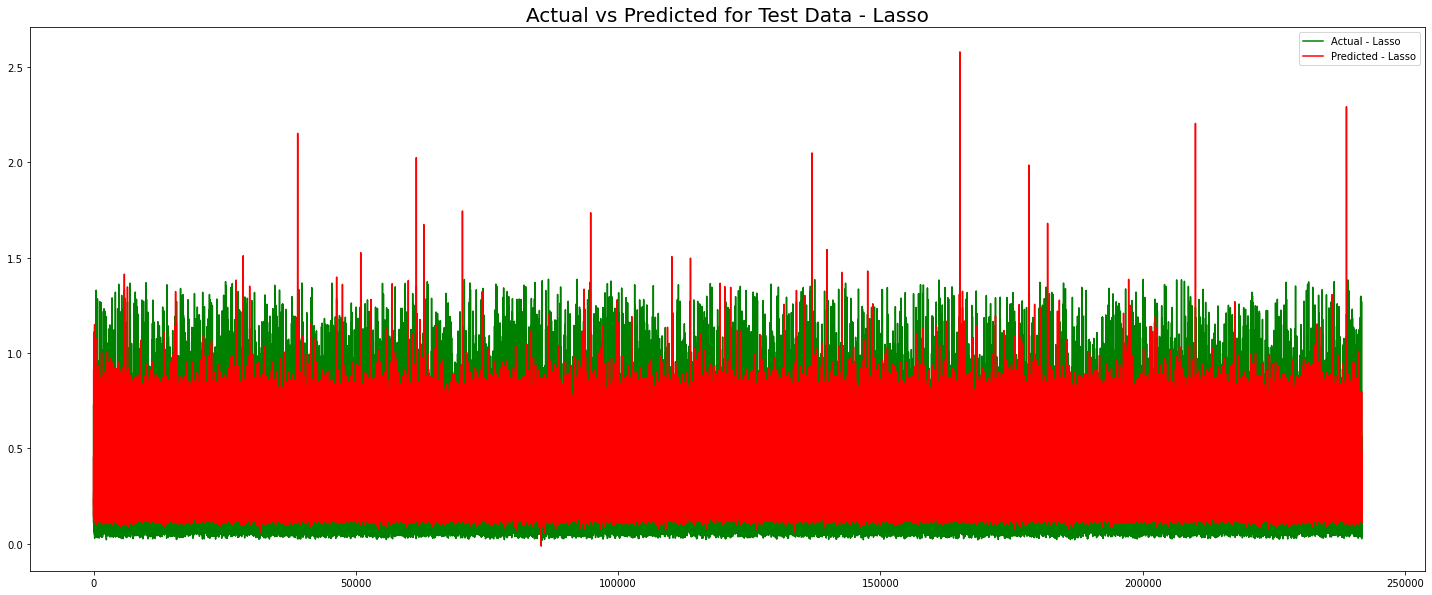

In [ ]:
# Comparing Actual vs Prediction
plt.figure(figsize= (25,10))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=1.5, linestyle='-')
plt.plot(c, y_lasso_test_pred, color='red', linewidth=1.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data - Lasso', fontsize=20)
plt.legend(["Actual - Lasso", "Predicted - Lasso"])
plt.show()

Here again the result doesn't improved at all in Lasso regression. 

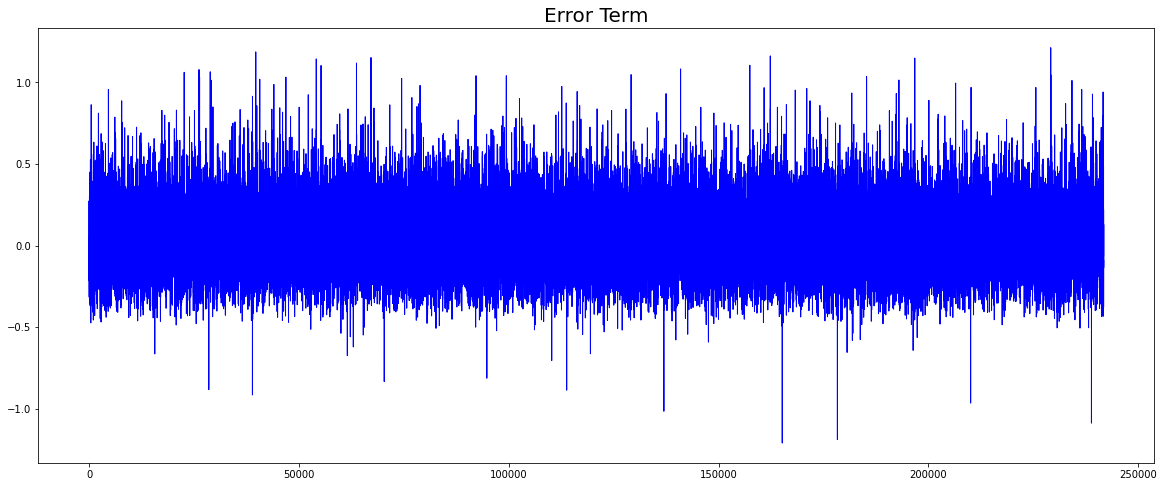

In [ ]:
# Plotting error of lasso regressor
plt.figure(figsize= (20,8))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_lasso_test_pred, color='blue', linewidth=1, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

## **Decision Tree**

In [ ]:
# Importing Library
from sklearn.tree import DecisionTreeRegressor

### **Hyperparatmeter Tunning**

In [ ]:
# Maximum trees depth
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]

In [ ]:
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Cache variables contains the best parameters for the Decision Tree 
# -- to save time when running again

cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}

### **Decision Tree Regressor**

In [ ]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor()

**GridSearchCV**

In [ ]:
# Using GridSearchCV ()
dtr_grid = GridSearchCV(estimator=dtr, param_grid = cache, cv = 5, verbose=2, scoring='r2')

#Fitting the train value
dtr_grid.fit(X_train,y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.5s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.7s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.7s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.5s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [22],
                         'min_samples_split': [10]},
             scoring='r2', verbose=2)

In [ ]:
dtr_grid.best_score_

0.7210966804760327

In [ ]:
dtr_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10)

In [ ]:
# Predicting for train
y_dtr_train_pred = dtr_grid.predict(X_train)
y_dtr_train_pred

array([0.12743866, 0.45326592, 0.06169753, ..., 0.30349575, 0.22347212,
       0.24892222])

In [ ]:
# Predicting for test
y_dtr_test_pred = dtr_grid.predict(X_test)
y_dtr_test_pred

array([0.2077945 , 0.08605057, 0.28135833, ..., 0.10954206, 0.29471943,
       0.18115176])

### Evaluation of Model

In [ ]:
# For training set
dtr_MSE_tr  = mean_squared_error(y_train, y_dtr_train_pred)
print("DTR MSE :" , dtr_MSE_tr)

dtr_RMSE_tr = np.sqrt(dtr_MSE_tr)
print("DTR RMSE :" ,dtr_RMSE_tr)

dtr_R2_tr = r2_score(y_train, y_dtr_train_pred)
print("DTR R2 :" ,dtr_R2_tr)

dtr_Ad_R2_tr= 1-(1-r2_score(y_train, y_dtr_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("DTR Adjusted R2 : ", dtr_Ad_R2_tr)

DTR MSE : 0.008673486257441463
DTR RMSE : 0.09313155350063405
DTR R2 : 0.7260336231153792
DTR Adjusted R2 :  0.7260288070157539


In [ ]:
# For testing set
dtr_MSE_tst  = mean_squared_error(y_test, y_dtr_test_pred)
print("DTR test MSE :" , dtr_MSE_tst)

dtr_RMSE_tst = np.sqrt(dtr_MSE_tst)
print("DTR test RMSE :" ,dtr_RMSE_tst)

dtr_R2_tst = r2_score(y_test, y_dtr_test_pred)
print("DTR test R2 :" ,dtr_R2_tst)

dtr_Ad_R2_tst= 1-(1-r2_score(y_test, y_dtr_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("DTR test Adjusted R2 : ", dtr_Ad_R2_tst)

DTR test MSE : 0.008806195306781015
DTR test RMSE : 0.09384133048279428
DTR test R2 : 0.7207922686006163
DTR test Adjusted R2 :  0.7207726346324681


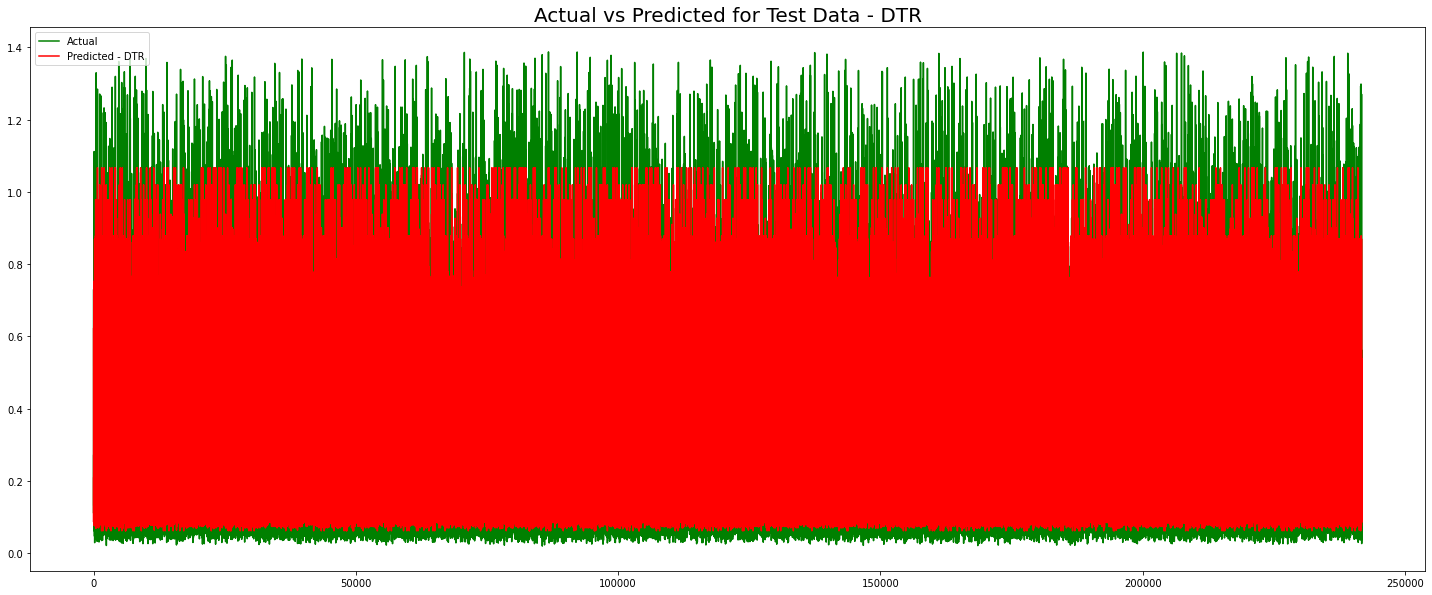

In [ ]:
# Comparing Actual vs Prediction
plt.figure(figsize= (25,10))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=1.5, linestyle='-')
plt.plot(c, y_dtr_test_pred, color='red', linewidth=1.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data - DTR', fontsize=20)
plt.legend(["Actual", "Predicted - DTR"])
plt.show()

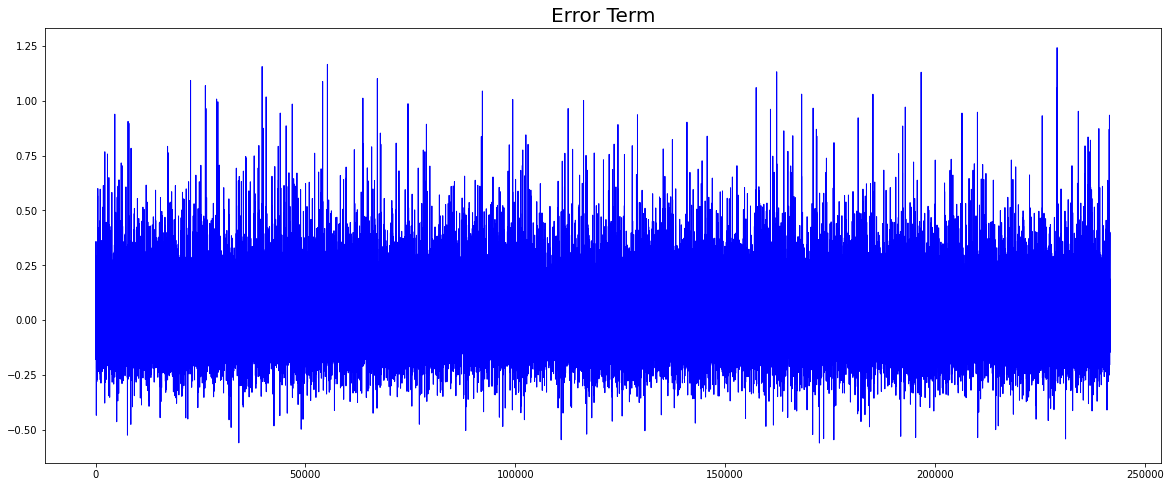

In [ ]:
# Plotting error of Decision Tree
plt.figure(figsize= (20,8))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_dtr_test_pred, color='blue', linewidth=1, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

Decision tree regressor shown some improvement in prediction in compare to linear regression and lasso regression. 

## **Ridge Regression**

In [ ]:
# Importing library
from sklearn.linear_model import Ridge

**Cross Validation**

In [ ]:
# Using cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
# Again finding the best fit alpha value 
print('Best fit alpha value is :', ridge_regressor.best_params_)
print('R2 score using the alpha is :', ridge_regressor.best_score_)

Best fit alpha value is : {'alpha': 30}
R2 score using the alpha is : 0.5959408915420481


In [ ]:
ridge_regressor.best_estimator_

Ridge(alpha=30)

In [ ]:
ridge_regressor.score(X_train, y_train)

0.5959772127750308

In [ ]:
# Predicting for train
y_rr_train_pred = ridge_regressor.predict(X_train)
y_rr_train_pred

array([0.16717155, 0.67120753, 0.15864663, ..., 0.21764482, 0.22410221,
       0.31503595])

In [ ]:
# Predicting for test
y_rr_test_pred = ridge_regressor.predict(X_test)
y_rr_test_pred

array([0.23527153, 0.14205223, 0.31190978, ..., 0.18007231, 0.32723205,
       0.22310757])

### Evaluation of Model

In [ ]:
# For training set
rr_MSE_tr  = mean_squared_error(y_train, y_rr_train_pred)
print("RR MSE :" , rr_MSE_tr)

rr_RMSE_tr = np.sqrt(rr_MSE_tr)
print("RR RMSE :" ,rr_RMSE_tr)

rr_R2_tr = r2_score(y_train, y_rr_train_pred)
print("RR R2 :" ,rr_R2_tr)

rr_Ad_R2_tr= 1-(1-r2_score(y_train, y_rr_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("RR Adjusted R2 : ", rr_Ad_R2_tr)

RR MSE : 0.012790934904266648
RR RMSE : 0.11309701545251602
RR R2 : 0.5959772127750308
RR Adjusted R2 :  0.5959701103925549


In [ ]:
# For testing set
rr_MSE_tst  = mean_squared_error(y_test, y_rr_test_pred)
print("RR test MSE :" , rr_MSE_tst)

rr_RMSE_tst = np.sqrt(rr_MSE_tst)
print("RR test RMSE :" ,rr_RMSE_tst)

rr_R2_tst = r2_score(y_test, y_rr_test_pred)
print("RR test R2 :" ,rr_R2_tst)

rr_Ad_R2_tst= 1-(1-r2_score(y_test, y_rr_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("RR test Adjusted R2 : ", rr_Ad_R2_tst)

RR test MSE : 0.01275219438123181
RR test RMSE : 0.11292561437172617
RR test R2 : 0.5956810927409243
RR test Adjusted R2 :  0.5956526609188288


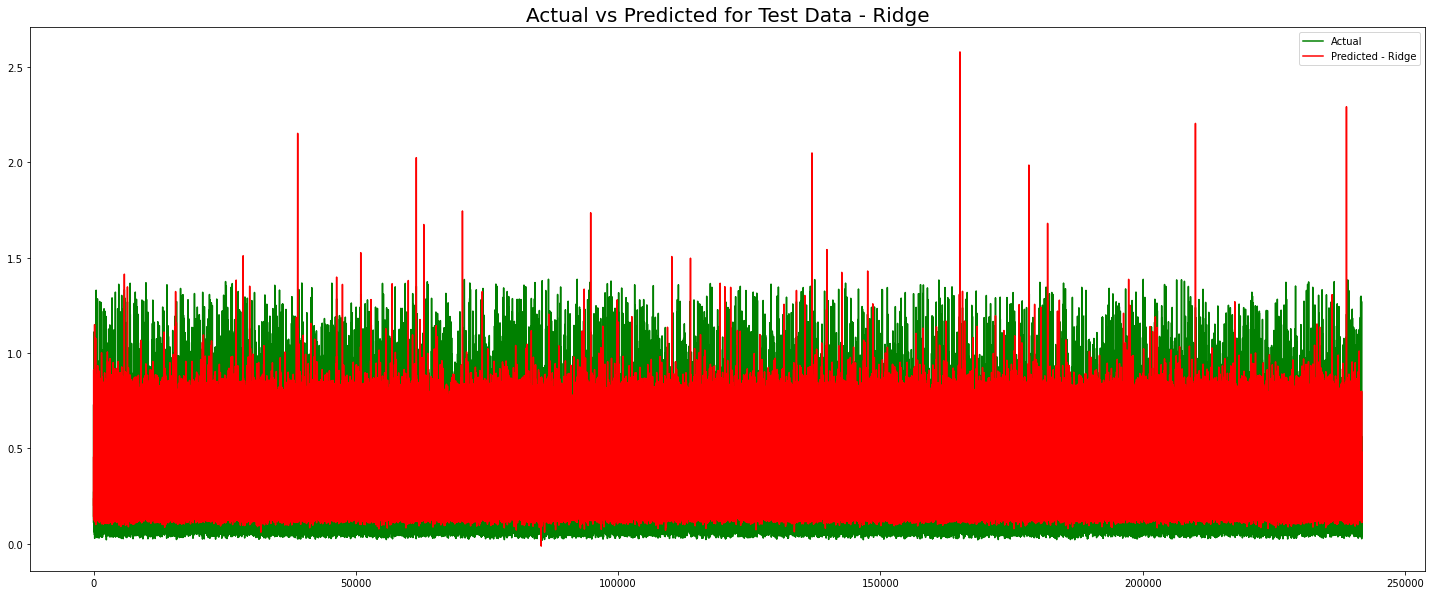

In [ ]:
# Comparing Actual vs Prediction
plt.figure(figsize= (25,10))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=1.5, linestyle='-')
plt.plot(c, y_rr_test_pred, color='red', linewidth=1.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data - Ridge', fontsize=20)
plt.legend(["Actual", "Predicted - Ridge"])
plt.show()

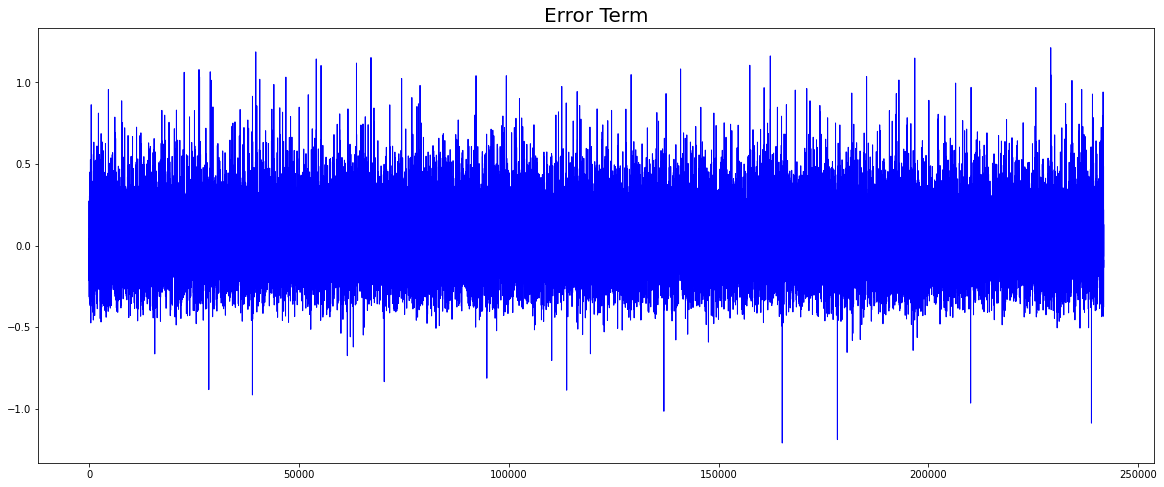

In [ ]:
# Plotting Error pof Ridge Regressor
plt.figure(figsize= (20,8))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_rr_test_pred, color='blue', linewidth=1, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

With the above result, it can been seen clearly again no improvement has been found in prediction and underfitting is being detected. Only in decision tree regressor some improvement seen. 

## **XGBoost_Regressor**

In [ ]:
# Importing library
import xgboost as xgb

In [ ]:
# Finding the tree depth
n_estimators = [80,150,200]
 
# Maximum tree depth
max_depth = [5,8,10]
min_samples_split = [40,50]
learning_rate=[0.2,0.4,0.6]

**Hyperparameter tuning**

In [ ]:
# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }

In [ ]:
# Cache variables contains the best parameters for the Decision Tree 
# -- to save time when running again
cache = {'n_estimators' : [200],
              'max_depth' : [8],
             'min_samples_' : [40],
             'learning_rate' : [0.2],
             }

In [ ]:
param_xgb

{'n_estimators': [80, 150, 200],
 'max_depth': [5, 8, 10],
 'min_samples_': [40, 50],
 'learning_rate': [0.2, 0.4, 0.6]}

In [ ]:
# XGbooster
xgb_model = xgb.XGBRegressor()

In [ ]:
# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid = cache, cv = 3, verbose=1, scoring="r2")

#Fitting the train and test
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[07:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:14:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_samples_': [40], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [ ]:
xgb_grid.best_score_

0.805989735589864

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 40, 'n_estimators': 200}

In [ ]:
# Predicting for train
y_xgb_train_pred = xgb_grid.predict(X_train)
y_xgb_train_pred

array([0.15545142, 0.46087378, 0.04789531, ..., 0.2908221 , 0.24931213,
       0.20332474], dtype=float32)

In [ ]:
# Predicting for test
y_xgb_test_pred = xgb_grid.predict(X_test)
y_xgb_test_pred

array([0.21041578, 0.09512401, 0.22506845, ..., 0.14489609, 0.34850156,
       0.16088805], dtype=float32)

### Evaluation of Model

In [ ]:
# For training set
xgb_MSE_tr  = mean_squared_error(y_train, y_xgb_train_pred)
print("XGB MSE :" , xgb_MSE_tr)

xgb_RMSE_tr = np.sqrt(xgb_MSE_tr)
print("XGB RMSE :" ,xgb_RMSE_tr)

xgb_R2_tr = r2_score(y_train, y_xgb_train_pred)
print("XGB R2 :" ,xgb_R2_tr)

xgb_Ad_R2_tr= 1-(1-r2_score(y_train, y_xgb_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("XGB Adjusted R2 : ", xgb_Ad_R2_tr)

XGB MSE : 0.005282470907965323
XGB RMSE : 0.07268060888548832
XGB R2 : 0.8331444389605134
XGB Adjusted R2 :  0.8331415057793904


In [ ]:
# For testing set
xgb_MSE_tst  = mean_squared_error(y_test, y_xgb_test_pred)
print("XGB test MSE :" , xgb_MSE_tst)

xgb_RMSE_tst = np.sqrt(xgb_MSE_tst)
print("XGB test RMSE :" ,xgb_RMSE_tst)

xgb_R2_tst = r2_score(y_test, y_xgb_test_pred)
print("XGB test R2 :" ,xgb_R2_tst)

xgb_Ad_R2_tst= 1-(1-r2_score(y_test, y_xgb_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("XGB test Adjusted R2 : ", xgb_Ad_R2_tst)

XGB test MSE : 0.00607888448037505
XGB test RMSE : 0.07796720131167369
XGB test R2 : 0.8072639220370808
XGB test Adjusted R2 :  0.807250368780526


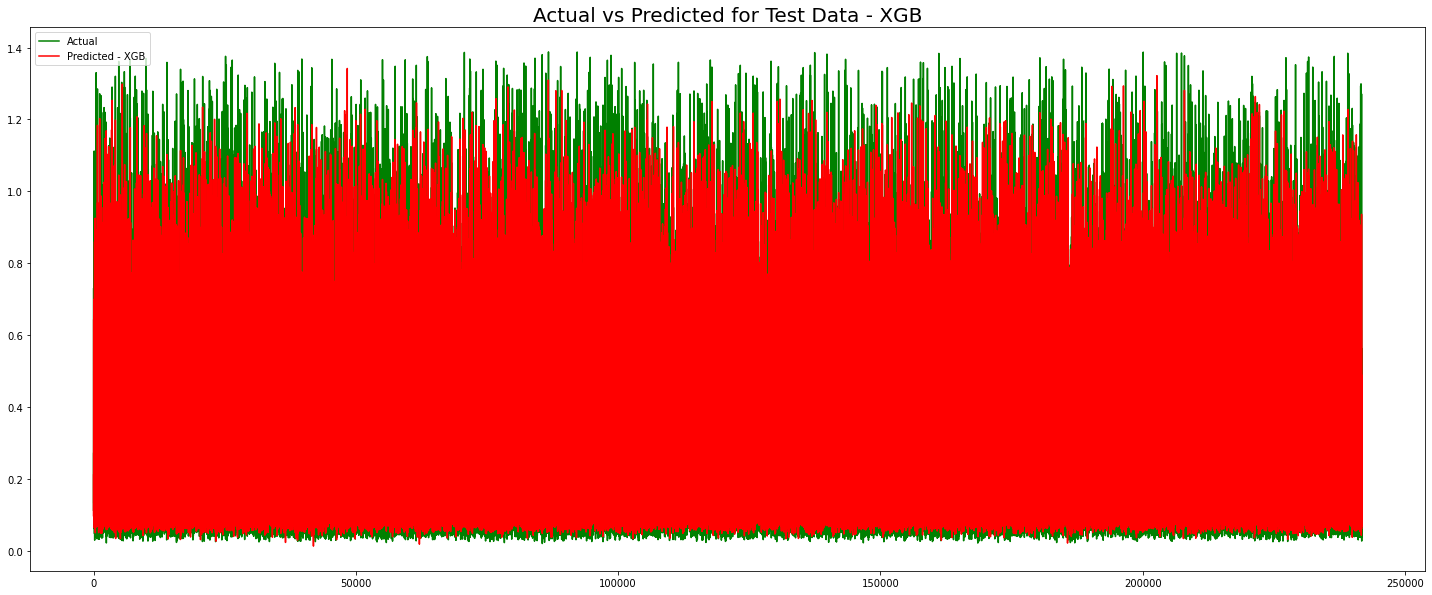

In [ ]:
# Comparing Actual vs Prediction
plt.figure(figsize= (25,10))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=1.5, linestyle='-')
plt.plot(c, y_xgb_test_pred, color='red', linewidth=1.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data - XGB', fontsize=20)
plt.legend(["Actual", "Predicted - XGB"])
plt.show()

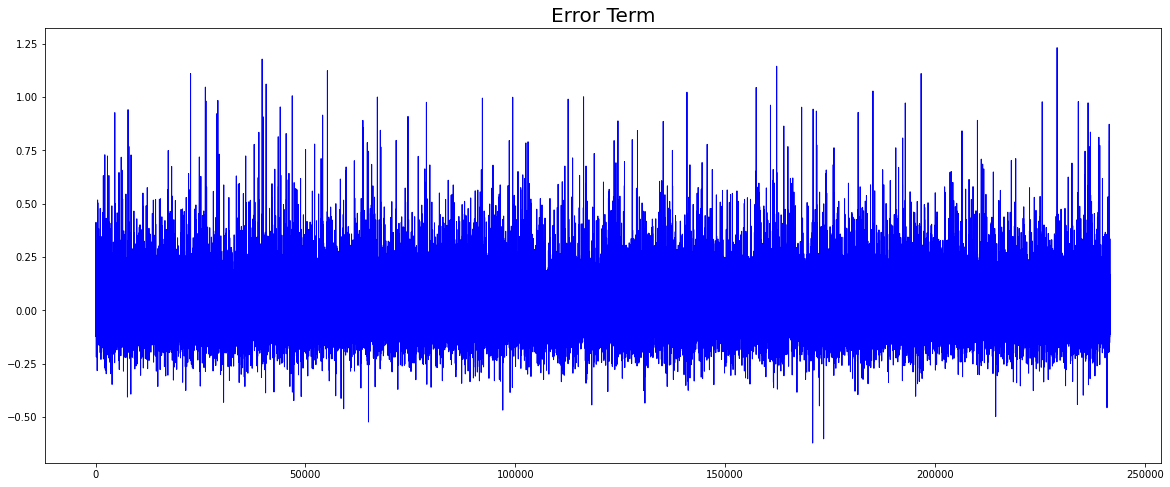

In [ ]:
# Plotting Error of XGboost
plt.figure(figsize= (20,8))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_xgb_test_pred, color='blue', linewidth=1, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

Here we can clearly see a very good prediction has been done than rest of the other regressors.

## **Random Forest Regressor**

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor() 

In [ ]:
# Hyperparameter Tuning
grid_values = {'n_estimators':[20],
               'max_depth':[4,6,8,10]}
rf_class = GridSearchCV(rf, param_grid = grid_values, scoring = 'r2', cv=5)

In [ ]:
# Fit the object to train dataset
rf_class.fit (X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10], 'n_estimators': [20]},
             scoring='r2')

In [ ]:
rf_class.best_score_

0.7314189386120573

In [ ]:
rf_class.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=20)

In [ ]:
# Predicting for train
y_rf_train_pred = rf_class.predict(X_train)
y_rf_train_pred

array([0.12744902, 0.46111024, 0.06389559, ..., 0.30214266, 0.23734196,
       0.24832897])

In [ ]:
# Predicting for test
y_rf_test_pred = rf_class.predict(X_test)
y_rf_test_pred

array([0.22169643, 0.08994524, 0.30149036, ..., 0.11547941, 0.30854405,
       0.18742248])

### Evaluation of Model

In [ ]:
# For training set
rf_MSE_tr  = mean_squared_error(y_train, y_rf_train_pred)
print("RF MSE :" , rf_MSE_tr)

rf_RMSE_tr = np.sqrt(rf_MSE_tr)
print("RF RMSE :" , rf_RMSE_tr)

rf_R2_tr = r2_score(y_train, y_rf_train_pred)
print("RF R2 :" ,rf_R2_tr)

rf_Ad_R2_tr= 1-(1-r2_score(y_train, y_rf_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("RF Adjusted R2 : ", rf_Ad_R2_tr)

RF MSE : 0.00833441443056369
RF RMSE : 0.09129301413889067
RF R2 : 0.736743766321481
RF Adjusted R2 :  0.73673913849721


In [ ]:
# For testing set
rf_MSE_tst  = mean_squared_error(y_test, y_rf_test_pred)
print("RF test MSE :" , xgb_MSE_tst)

rf_RMSE_tst = np.sqrt(rf_MSE_tst)
print("RF test RMSE :" ,rf_RMSE_tst)

rf_R2_tst = r2_score(y_test, y_rf_test_pred)
print("RF test R2 :" ,rf_R2_tst)

rf_Ad_R2_tst= 1-(1-r2_score(y_test, y_rf_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("RF test Adjusted R2 : ", rf_Ad_R2_tst)

RF test MSE : 0.00607888448037505
RF test RMSE : 0.092073196002078
RF test R2 : 0.7312146687976697
RF test Adjusted R2 :  0.7311957677357075


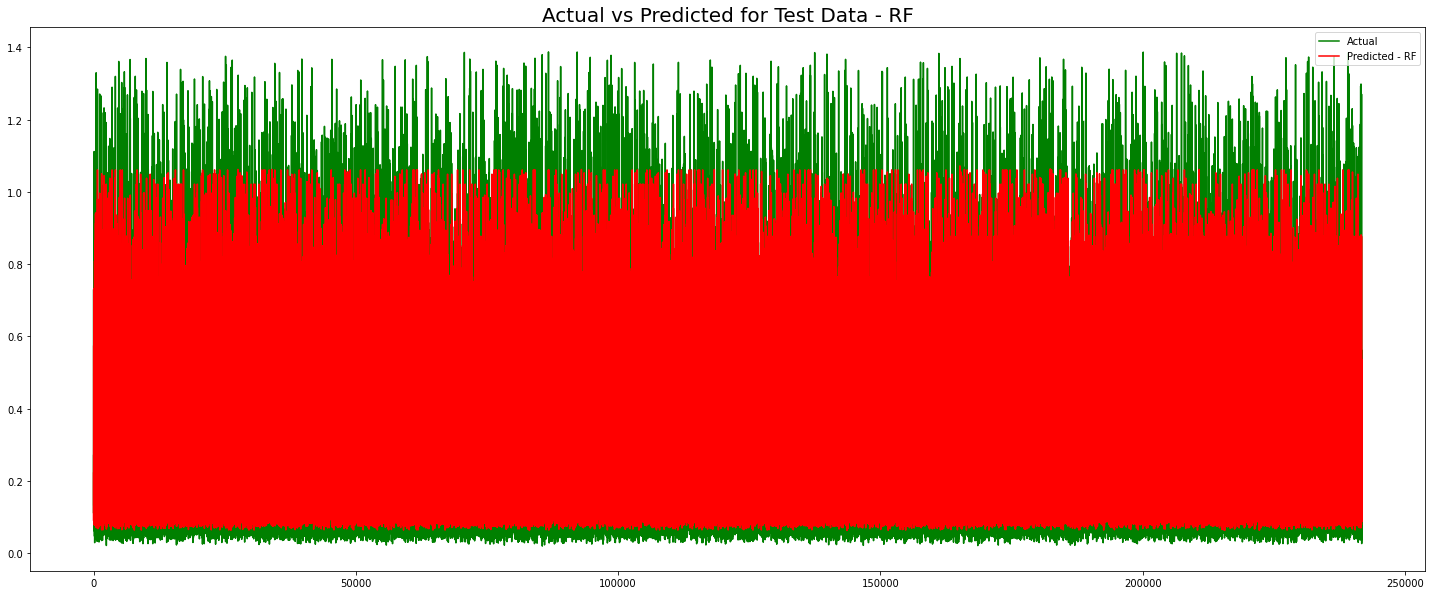

In [ ]:
# Comparing Actual vs Prediction
plt.figure(figsize= (25,10))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=1.5, linestyle='-')
plt.plot(c, y_rf_test_pred, color='red', linewidth=1.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data - RF', fontsize=20)
plt.legend(["Actual", "Predicted - RF"])
plt.show()

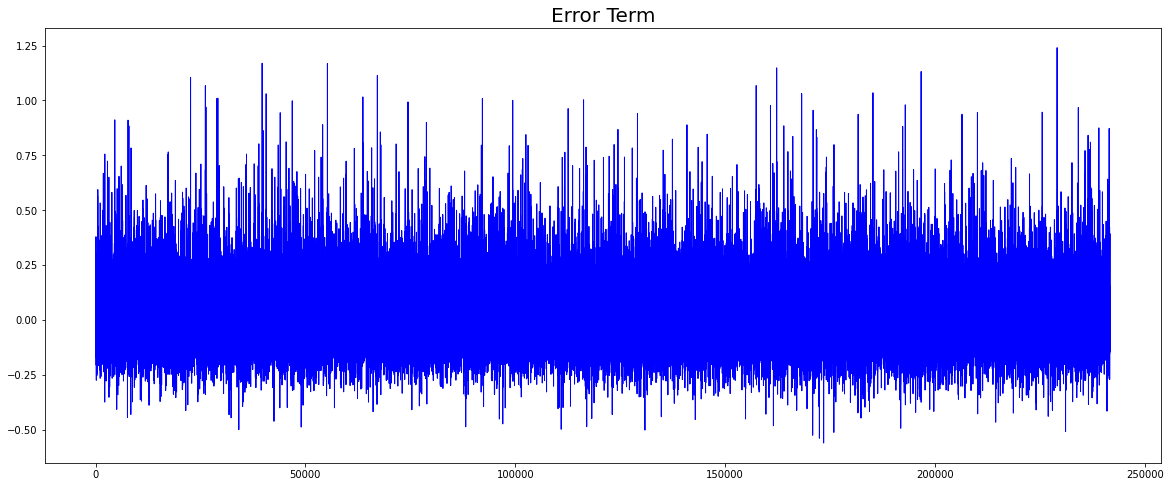

In [ ]:
# Plotting Error of Random Forest Regressor
plt.figure(figsize= (20,8))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_rf_test_pred, color='blue', linewidth=1, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

The error term of random forest regressor showed a little bit improvement but not much. 

## **Feature Importance**

In [ ]:
# Preparing dataframe of feature and important features in XGBoost regressor- as it showed the best result.
impt_feat = pd.DataFrame({'Feature': col, 'Feature_importance': list(xgb_grid.best_estimator_.feature_importances_)})
impt_feat

,Feature,Feature_importance
0,vendor_id,0.002065
1,passenger_count,0.001931
2,pickup_longitude,0.014309
3,pickup_latitude,0.011405
4,dropoff_longitude,0.014228
5,dropoff_latitude,0.022095
6,pickup_hour,0.073353
7,pickup_month,0.019206
8,distance,0.557973
9,store_and_fwd_flag_N,0.003468


In [ ]:
impt_feat.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

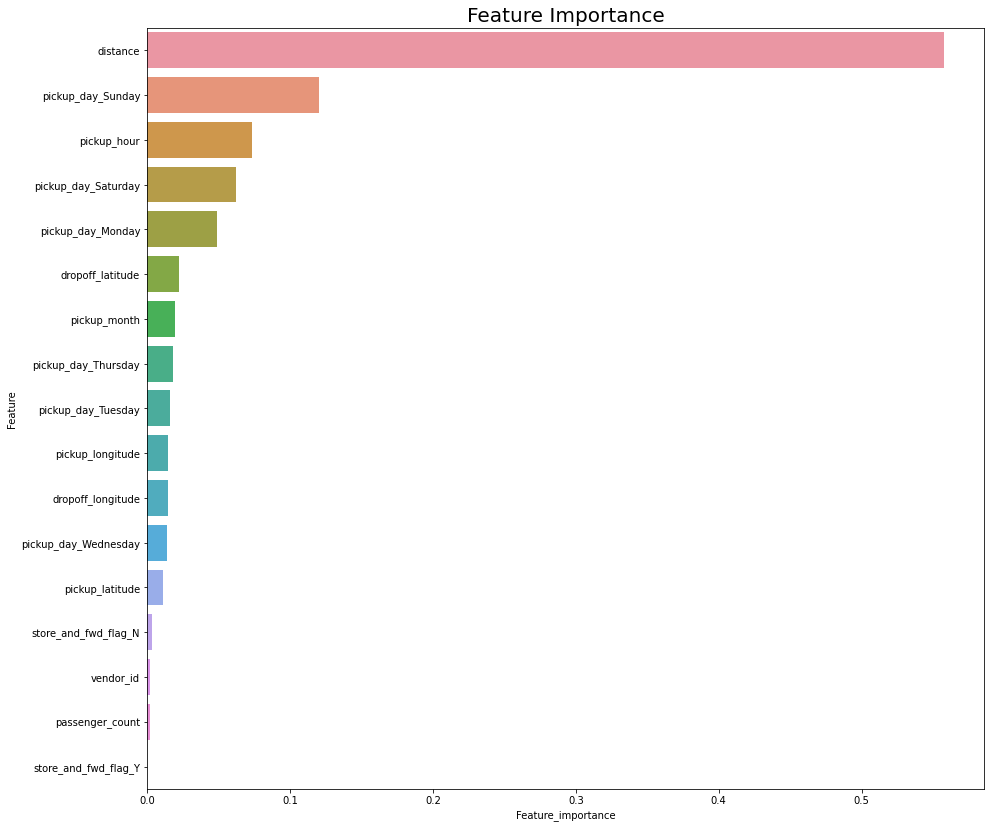

In [ ]:
# Plotting the graph to understand the details more
plt.figure(figsize=(15,14))
sns.barplot(y='Feature', x='Feature_importance', data=impt_feat)
plt.title("Feature Importance", fontsize=20)
plt.show()

*   Here from the graph it can analyzed that the distance is among the most important feature of all. 

*   And duration of trips directly dependent on distance.

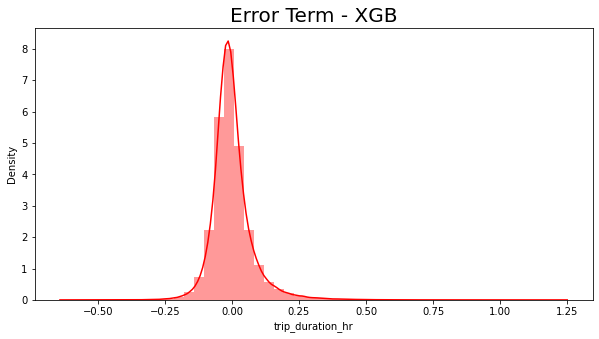

In [ ]:
# Plotting the error terms to understand
plt.figure(figsize=(10,5))
sns.distplot(y_test - y_xgb_test_pred, color='r')
plt.title('Error Term - XGB', fontsize=20)
plt.show()

## **Model Evaluation**

Final analysis of all the models with their train, test, train prediction and test prediction. 

## **Training data values**

In [ ]:
# Models Summary for the Train data.
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor','Random Forest Regressor']
MSE_train = [lr_MSE_tr, lasso_MSE_tr, rr_MSE_tr, dtr_MSE_tr, xgb_MSE_tr, rf_MSE_tr]
RMSE_train = [lr_RMSE_tr, lasso_RMSE_tr, rr_RMSE_tr, dtr_RMSE_tr, xgb_RMSE_tr, rf_RMSE_tr]
R2_train = [lr_R2_tr, lasso_R2_tr, rr_R2_tr, dtr_R2_tr, xgb_R2_tr, rf_R2_tr]
Ad_R2_train = [lr_Ad_R2_tr, lasso_Ad_R2_tr, rr_Ad_R2_tr, dtr_Ad_R2_tr, xgb_Ad_R2_tr, rf_Ad_R2_tr]

## **Testing data values**

In [ ]:
# Models Summary for the test data
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor', 'Random Forest Regressor']
MSE_test = [lr_MSE_tst, lasso_MSE_tst, rr_MSE_tst, dtr_MSE_tst, xgb_MSE_tst,rf_MSE_tst]
RMSE_test = [lr_RMSE_tst, lasso_RMSE_tst, rr_RMSE_tst, dtr_RMSE_tst, xgb_RMSE_tst, rf_RMSE_tst]
R2_test = [lr_R2_tst, lasso_R2_tst, rr_R2_tst, dtr_R2_tst, xgb_R2_tst, rf_R2_tst]
Ad_R2_test = [lr_Ad_R2_tst, lasso_Ad_R2_tst, rr_Ad_R2_tst, dtr_Ad_R2_tst, xgb_Ad_R2_tst, rf_Ad_R2_tst]

In [ ]:
Train_data_df=pd.DataFrame({'Model Name': models, 'Train MSE': MSE_train, 'Train RMSE': RMSE_train, 'Train R^2': R2_train, 
                            'Train Adjusted R^2': Ad_R2_train})
Train_data_df

,Model Name,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
0,Linear Regression,0.012791,0.113097,0.595977,0.595970
1,Lasso Regression,0.012791,0.113097,0.595977,0.595970
2,Ridge Regression,0.012791,0.113097,0.595977,0.595970
3,DecisionTree Regressor,0.008673,0.093132,0.726034,0.726029
4,XGBoost Regressor,0.005282,0.072681,0.833144,0.833142
5,Random Forest Regressor,0.008334,0.091293,0.736744,0.736739


In [ ]:
Test_data_df= pd.DataFrame({'Model Name': models, 'Test MSE': MSE_test, 'Test RMSE': RMSE_test, 'Test R^2': R2_test, 
                            'Test Adjusted R^2': Ad_R2_test})
Test_data_df

,Model Name,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
0,Linear Regression,0.012752,0.112926,0.595680,0.595651
1,Lasso Regression,0.012752,0.112926,0.595681,0.595653
2,Ridge Regression,0.012752,0.112926,0.595681,0.595653
3,DecisionTree Regressor,0.008806,0.093841,0.720792,0.720773
4,XGBoost Regressor,0.006079,0.077967,0.807264,0.807250
5,Random Forest Regressor,0.008477,0.092073,0.731215,0.731196


## **Conclusion**

The present analysis of NYC taxi trip time prediction using supervised regression method was quite challenging but it provided us lots of insights. As the dataset is huge, so I have use different regression models to get the better prediction.

*   Firstly, their is not much difference between the train and test values of **Linear Regression**, **Lasso Regression**, **Ridge Regression** during the **MSE**, **RMSE**.
*   But the model performance of the above mentioned regression models suddenly increases for **R^2** and **Adjusted R^2** value. 
*   The model performance for the **Decision Tree Rregressor**, **XGBoost Regressor** and **Random Forest Regressor** finally showed some good performance in both train and test data for **MSE**, **RMSE**. 
*    For R^2 and Adjusted R^2 all above mentioned regressors showed a better running model. 
*    But among all the used models for ML regression analysis, **XGBoost Regressor** showed the best performance with **80.72%** in test R^2 value and **83.31%** in train R^2.  





## **Future Scope...**

In this present project of NYC taxi trip time prediction, I have tried to use regressor models as per my understanding. No doubt there is always further scope for its improvement and analysis to  be done in more precise manner. If you find any further input to be added or to be removed in this ML project, please let me know. 